<a href="https://colab.research.google.com/github/lukehuang33/hubble_tension_analysis/blob/main/SS_2023_24_Luke_Huang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**2023-24 Senior Seminar Project <br>Multicale Analysis of the Hubble Tension in an Evaluation of the ΛCDM Model<br>
Luke Huang**

**Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp
#allow google drive files
from google.colab import drive
drive.mount('/content/drive')
import csv
import os
from os import listdir
from os.path import isfile, join, splitext
#more imports for math operations
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy import stats
import sympy as smp
import math
from scipy.stats import chisquare
#using astropy and lambdaCDM function
from astropy.cosmology import FlatLambdaCDM
from scipy.optimize import minimize
import scipy.stats
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.stats import norm
from matplotlib.patches import Polygon
from scipy.stats import pearsonr

Mounted at /content/drive


In [ ]:
#convert Pantheon+SH0ES to .csv format
df_shoes = pd.read_csv('/content/drive/MyDrive/Pantheon+SH0ES.dat', sep='\s+', header=None)
df_shoes.rename(columns=df_shoes.iloc[0], inplace = True)
df_shoes.drop(df_shoes.index[0], inplace = True)
pd.set_option('display.max_columns', None)
df_shoes

CID IDSURVEY      zHD   zHDERR     zCMB zCMBERR     zHEL  \
1            2011fe       51  0.00122  0.00084  0.00122   2e-05  0.00082   
2            2011fe       56  0.00122  0.00084  0.00122   2e-05  0.00082   
3            2012cg       51  0.00256  0.00084  0.00256   2e-05  0.00144   
4            2012cg       56  0.00256  0.00084  0.00256   2e-05  0.00144   
5     1994DRichmond       50  0.00299  0.00084  0.00299   4e-05  0.00187   
...             ...      ...      ...      ...      ...     ...      ...   
1697       rutledge      106  1.61505  0.00545  1.61499   0.005  1.61399   
1698           geta      106  1.69706  0.04006  1.69702    0.04      1.7   
1699          stone      106  1.80119  0.02014  1.80111    0.02      1.8   
1700         wilson      106  1.91165  0.00263   1.9116   0.001  1.91401   
1701         colfax      106  2.26137  0.02018   2.2613    0.02     2.26   

     zHELERR m_b_corr m_b_corr_err_DIAG MU_SH0ES MU_SH0ES_ERR_DIAG CEPH_DIST  \
1      2e-05  9.74571           1.51621  28.9987           1.51645    29.177   
2      2e-05  9.80286           1.51723  29.0559           1.51747    29.177   
3      2e-05  11.4703          0.781906  30.7233          0.782372   30.8433   
4      2e-05  11.4919          0.798612  30.7449          0.799068   30.8433   
5      4e-05  11.5227          0.880798  30.7757          0.881212        -9   
...      ...      ...               ...      ...               ...       ...   
1697   0.005  25.9065          0.331927  45.1595          0.333024        -9   
1698    0.04  26.0333          0.379521  45.2863           0.38048        -9   
1699    0.02  26.2335          0.280685  45.4865          0.281981        -9   
1700   0.001  26.1703          0.357624  45.4233          0.358642        -9   
1701    0.02  26.9298          0.280011  46.1828          0.281309        -9   

     IS_CALIBRATOR USED_IN_SH0ES_HF          c      cERR         x1     x1ERR  \
1                1                0    -0.1076   0.04008  -0.548188   0.13373   
2                1                0  -0.032895  0.038463  -0.380481    0.0861   
3                1                0    0.10073  0.018231    0.49196  0.023545   
4                1                0    0.12247   0.03903    0.71261  0.083554   
5                0                0  -0.111684  0.026044   -1.61803  0.049543   
...            ...              ...        ...       ...        ...       ...   
1697             0                0   0.063905  0.043928    0.94408   1.08966   
1698             0                0  -0.164422  0.099436    0.99124   0.95298   
1699             0                0  -0.024483  0.086306  -0.544536   0.70361   
1700             0                0   0.063709   0.14866   -1.65392   0.77302   
1701             0                0    0.11885   0.13129    0.03023   1.18197   

           mB      mBERR           x0        x0ERR      COV_x1_c  \
1     9.58436  0.0327221      2.63181    0.0793177    0.00011378   
2     9.78448  0.0352442       2.1888    0.0710511  -0.000443845   
3     11.8161  0.0237119      0.33695   0.00735879  -6.06025e-05   
4     11.8801  0.0359611      0.31765    0.0105211   0.000222656   
5     11.5334  0.0322548      0.43715    0.0129866  -9.88782e-05   
...       ...        ...          ...          ...           ...   
1697  25.9969  0.0689133  7.16551e-07  4.54805e-08     0.0102656   
1698   25.699  0.0882218  9.42746e-07  7.66031e-08   -0.00413208   
1699  26.1937  0.0803361  5.97745e-07  4.42286e-08     0.0188575   
1700  26.2802    0.17033  5.51965e-07  8.65917e-08     0.0707819   
1701  26.8097  0.0710096  3.38944e-07  2.21677e-08     0.0198827   

         COV_x1_x0      COV_c_x0       RA      DEC HOST_RA HOST_DEC  \
1      -0.00052525   -0.00272765  210.774  54.2737    -999     -999   
2      -0.00150198   -0.00220084  210.774  54.2737    -999     -999   
3      9.35054e-06  -0.000110842  186.803   9.4203    -999     -999   
4     -0.000136637  -0.000344022  186.803   9.4203    -999     -999 

In [ ]:
#Cepheid and TGRB point data

tgrb_lmc_H0 = 69.9
tgrb_ngc_H0 = 69.7
tgrb_smc_H0 = 69.5
tgrb_lmc_err = 1.6
tgrb_ngc_err = 2.0
tgrb_smc_err = 1.7

ceph_lmc_H0 = 74.2
ceph_ngc_H0 = 72.0
ceph_lmc_err = 1.82
ceph_ngc_err = 1.9

In [ ]:
tgrb_H0 = 69.8
tgrb_err = 1.6
ceph_H0 = 73.2
ceph_err = 1.3
t1a_low_H0 = 72.36
t1a_high_H0 = 73.00
t1a_low_err = 0.144
t1a_high_err = 0.006
CMB_H0 = 67.4
CMB_err = 0.5

**Implementation**

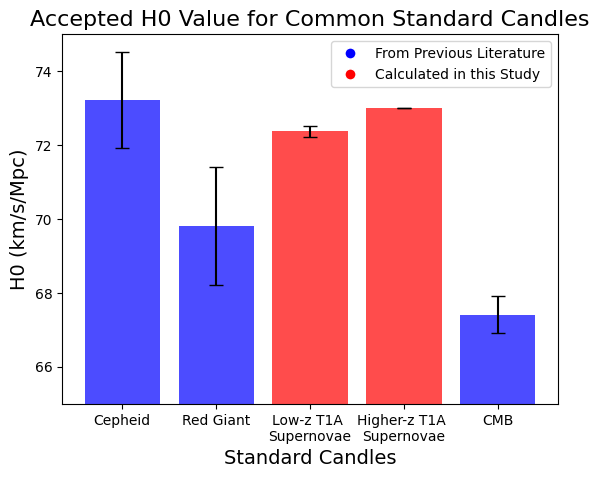

In [ ]:
#creating standard candle charts

from matplotlib.lines import Line2D

categories = ['Cepheid', 'Red Giant', 'Low-z T1A \nSupernovae', 'Higher-z T1A \nSupernovae', 'CMB']
means = [ceph_H0, tgrb_H0, t1a_low_H0, t1a_high_H0, CMB_H0]
errors = [ceph_err, tgrb_err, t1a_low_err, t1a_high_err, CMB_err]
colors = ['blue', 'blue', 'red', 'red', 'blue']

plt.title('Accepted H0 Value for Common Standard Candles', fontsize=16)
plt.ylabel('H0 (km/s/Mpc)', fontsize=14)
plt.xlabel('Standard Candles', fontsize=14)
bars = plt.bar(categories, means, yerr=errors, capsize=5, alpha=0.7, color=colors)
plt.ylim(65, 75)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='From Previous Literature'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Calculated in this Study')
]

plt.legend(handles=legend_elements)

plt.show()

(67.0, 76.5)

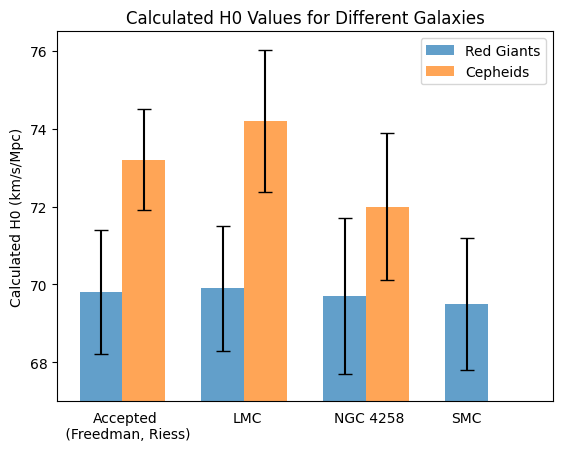

In [ ]:
bar_width = 0.35


categories = ['Accepted\n (Freedman, Riess)','LMC', 'NGC 4258', 'SMC']
index = np.arange(len(categories))
means1 = [tgrb_H0, tgrb_lmc_H0, tgrb_ngc_H0, tgrb_smc_H0]
errs1 = [tgrb_err, tgrb_lmc_err, tgrb_ngc_err, tgrb_smc_err]
plt.bar(index,  means1, yerr=errs1, capsize=5, alpha=0.7, width=bar_width, label='Red Giants')

means2 = [ceph_H0, ceph_lmc_H0, ceph_ngc_H0, 0]
errs2 = [ceph_err, ceph_lmc_err, ceph_ngc_err, 0]
plt.bar(index+bar_width, means2, yerr=errs2, capsize=5, alpha=0.7, width=bar_width, label='Cepheids')

plt.ylabel('Calculated H0 (km/s/Mpc)')
plt.title('Calculated H0 Values for Different Galaxies')
plt.tick_params(axis='x', which='both', bottom=False, top=False)

custom_positions = [0.2, 1.2, 2.2, 3]
plt.xticks(custom_positions, categories)
plt.legend(loc='upper right')
plt.ylim(67, 76.5)

[4.28595807e+00 8.57832848e+00 1.28771037e+01 ... 1.97580894e+04
 1.97676132e+04 1.97771377e+04] Mpc


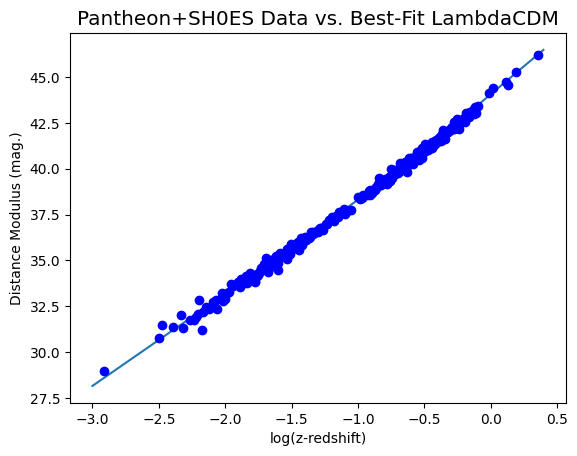

In [ ]:
#creating actual lambdaCDM model
model = FlatLambdaCDM(H0=70, Om0=0.334)

#x = z-redshift
x = np.arange(0.001, 2.5, 0.001)
luminosity_distances = model.luminosity_distance(x)
print(luminosity_distances)
#y = distance modulus
y = []
for element in luminosity_distances:
  y = np.append(y, 5 * np.log10(element.value) + 25)

#render the chart
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(np.log10(x),y)
ax.set_title('Pantheon+SH0ES Data vs. Best-Fit LambdaCDM')
ax.set_xlabel('log(z-redshift)')
ax.set_ylabel('Distance Modulus (mag.)')

#add Pantheon+SH0ES data to chart
shoes_zred_5 = df_shoes['zHD'][::5].values
shoes_mu_5 = df_shoes['MU_SH0ES'][::5].values
shoes_mu_err_5 = df_shoes['MU_SH0ES_ERR_DIAG'][::5].values
shoes_zred_5 = shoes_zred_5.astype(float)
shoes_mu_5 = shoes_mu_5.astype(float)
shoes_mu_err_5 = shoes_mu_err_5.astype(float)

#convert to decimal format
np.around(shoes_zred_5, decimals=3)
np.around(shoes_mu_5, decimals=3)
np.around(shoes_mu_err_5, decimals=3)

#plot and display the graph -> fits data well
ax.plot(np.log10(shoes_zred_5), shoes_mu_5, 'bo')
fig.show()

#this figure indicates that the model was fit properly. ignore the first point;
#it has a very low z value

In [ ]:
#calculate r value of correlation

r, _ = pearsonr(np.log10(shoes_zred_5), shoes_mu_5)

# Display the r-value
print(f"Correlation coefficient (r-value): {r:.4f}")

Correlation coefficient (r-value): 0.9982


In [ ]:
#optimize the LambdaCDM model parameters using the chi^2 calculation of the
#fitted LambdaCDM model and gradient descent

#LambdaCDM model
model = FlatLambdaCDM(H0=70, Om0=0.334)

#get np arrays for each stat
shoes_zred = df_shoes['zHD'].values
shoes_mu = df_shoes['MU_SH0ES'].values
shoes_mu_err = df_shoes['MU_SH0ES_ERR_DIAG'].values
shoes_zred = shoes_zred.astype(float)
shoes_mu = shoes_mu.astype(float)
shoes_mu_err = shoes_mu_err.astype(float)

#define the loss function for gradient descent (chi-square)
def chi_square_loss(params):
    H0, Om0 = params
    model = FlatLambdaCDM(H0=H0, Om0=Om0)
    luminosity_distances = model.luminosity_distance(shoes_zred)
    mu_pred = 5 * np.log10(luminosity_distances.value) + 25
    chi2 = np.sum(((shoes_mu - mu_pred) / shoes_mu_err) ** 2)
    return chi2

#initial guess for H0 and Om0 using Brout 2022
initial_params = np.array([73.6, 0.334])

# Add bounds for Om0 (it should be in the range [0, 1])
bounds = ((None, None), (0.0, 1.0))

# minimize the chi-square loss using gradient descent with bounds
result = minimize(chi_square_loss, initial_params, method='L-BFGS-B', bounds=bounds)

#extract the optimized parameters
optimal_params = result.x
H0_optimal, Om0_optimal = optimal_params

print("Optimal H0:", H0_optimal)
print("Optimal Om0:", Om0_optimal)
print("Optimal Chi-squared value:", result.fun)

Optimal H0: 72.97431085749487
Optimal Om0: 0.3508175869740449
Optimal Chi-squared value: 745.4001530736423


In [ ]:
#find residuals of each point

#initialize the optimized model
optimized_model = FlatLambdaCDM(H0=H0_optimal, Om0=Om0_optimal)
luminosity_distances = optimized_model.luminosity_distance(shoes_zred)
mu_pred = 5 * np.log10(luminosity_distances.value) + 25

#display the residuals
unnorm_residuals = shoes_mu - mu_pred
norm_residuals = (shoes_mu - mu_pred)/shoes_mu_err
print(unnorm_residuals)
print(norm_residuals)

[ 0.49669703  0.55389703  0.60975846 ... -0.01585234 -0.23555023
  0.08369399]
[ 0.32753934  0.3650135   0.77937153 ... -0.05621777 -0.65678373
  0.29751622]


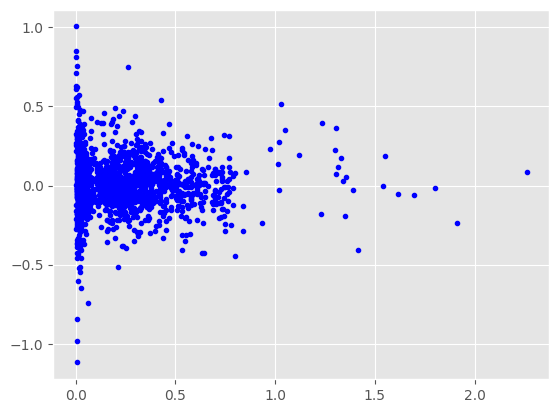

In [ ]:
#plot unnorm residuals vs. redshift, no downsampling

fig,ax = plt.subplots()
x_unnorm = shoes_zred
y_unnorm = unnorm_residuals

ax.plot(x_unnorm, y_unnorm, 'bo', markersize=3)
fig.show()

'\nGraph of unnormalized residuals of each supernova when fit to a best-fit\nLambdaCDM model\n'

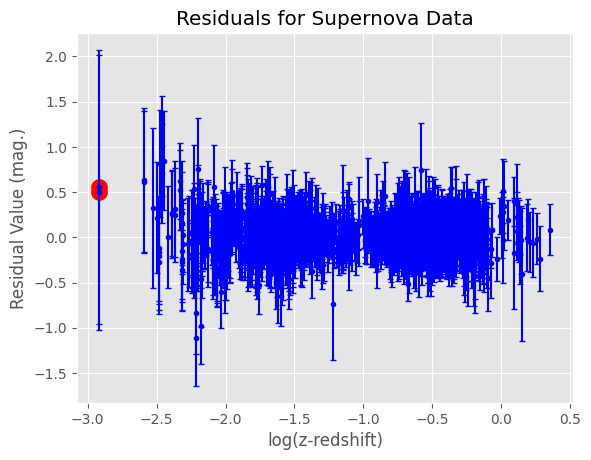

In [ ]:
#plot unnorm residuals vs. log(redshift) with error bars

#yes, error is higher for lower z due to peculiar velocities. Even the people
#who colleced the data do not know why the peculiar velocities are high.

fig,ax = plt.subplots()
x_unnorm_log = np.log10(shoes_zred)
y_unnorm = unnorm_residuals

indices_to_circle = [0, 1]

ax.errorbar(x_unnorm_log, y_unnorm, yerr=shoes_mu_err, fmt='bo', capsize=2, markersize=3)
plt.scatter(x_unnorm_log[indices_to_circle], y_unnorm[indices_to_circle], c='red', marker='o', s=100, edgecolor='red', linewidths=2)
plt.title("Residuals for Supernova Data")
plt.xlabel('log(z-redshift)')
plt.ylabel('Residual Value (mag.)')
fig.show()

'''
Graph of unnormalized residuals of each supernova when fit to a best-fit
LambdaCDM model
'''

In [ ]:
#find correlation coefficient for both low-z and high-z groups between observed
#and predicted distance modulus

r_low, _ = pearsonr(shoes_mu[shoes_zred < .01], mu_pred[shoes_zred < .01])
r_higher, _ = pearsonr(shoes_mu[shoes_zred > .01], mu_pred[shoes_zred > .01])

print(f"Correlation coefficient (r-value) for low-z: {r_low:.4f}")
print(f"Correlation coefficient (r-value) for high-z: {r_higher:.4f}")

Correlation coefficient (r-value) for low-z: 0.9207
Correlation coefficient (r-value) for high-z: 0.9987


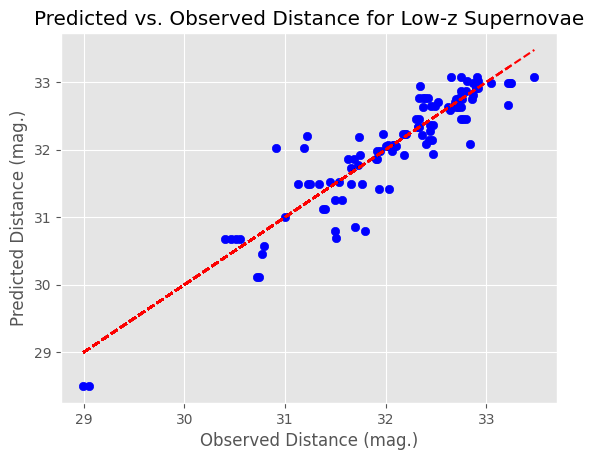

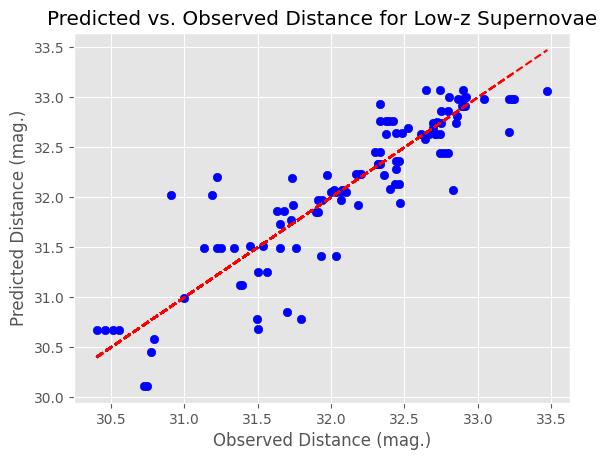

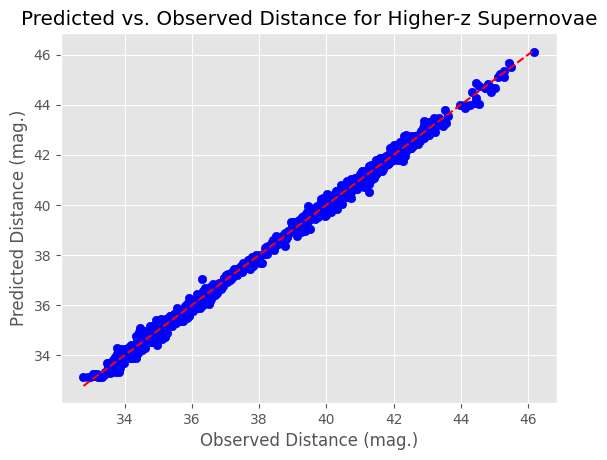

In [ ]:
#create graph of predicted vs. observed for both groups

fig,ax = plt.subplots()

ax.scatter(shoes_mu[shoes_zred < .01], mu_pred[shoes_zred < .01], color='blue')
x_line = np.linspace(min(shoes_mu), shoes_mu[shoes_zred < .01], 100)
y_line = x_line
plt.plot(x_line, y_line, color='red', linestyle='--')

plt.title("Predicted vs. Observed Distance for Low-z Supernovae")
plt.xlabel('Observed Distance (mag.)')
plt.ylabel('Predicted Distance (mag.)')
fig.show()

fig,ax = plt.subplots()

#remove first two values
shoes_mu_trim = shoes_mu[2:]
mu_pred_trim = mu_pred[2:]
shoes_zred_trim = shoes_zred[2:]

ax.scatter(shoes_mu_trim[shoes_zred_trim < .01], mu_pred_trim[shoes_zred_trim < .01], color='blue')
x_line = np.linspace(min(shoes_mu_trim), shoes_mu_trim[shoes_zred_trim < .01], 100)
y_line = x_line
plt.plot(x_line, y_line, color='red', linestyle='--')

plt.title("Predicted vs. Observed Distance for Low-z Supernovae")
plt.xlabel('Observed Distance (mag.)')
plt.ylabel('Predicted Distance (mag.)')
fig.show()

fig,ax = plt.subplots()

ax.scatter(shoes_mu[shoes_zred > .01], mu_pred[shoes_zred > .01], color='blue')
x_line = np.linspace(min(shoes_mu[shoes_zred > .01]), max(shoes_mu[shoes_zred > .01]), 100)
y_line = x_line
plt.plot(x_line, y_line, color='red', linestyle='--')

plt.title("Predicted vs. Observed Distance for Higher-z Supernovae")
plt.xlabel('Observed Distance (mag.)')
plt.ylabel('Predicted Distance (mag.)')
fig.show()

In [ ]:
#find outliers in redshift distribution

q1 = x_unnorm_log[425]
q3 = x_unnorm_log[1275]
iqr = q3-q1
lower_threshold = q1 - 1.5*iqr
upper_threshold = q3 + 1.5*iqr

print(lower_threshold)
print(upper_threshold)

-3.1677852435077254
1.127508391387173


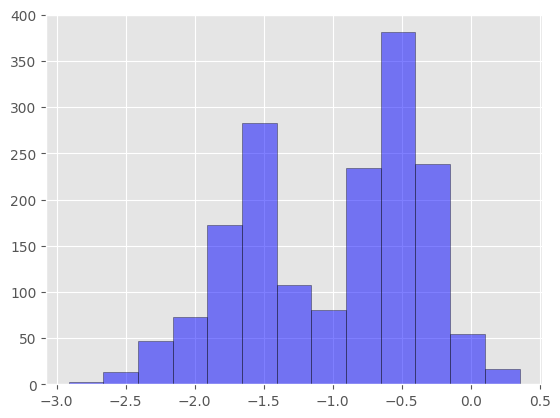

In [ ]:
#histogram to show distribution of supernova log(redshift) data -> see if it is normally distributed

bin_size = 0.25
num_bins = int((x_unnorm_log.max() - x_unnorm_log.min()) / bin_size)

counts= plt.hist(x_unnorm_log, bins=num_bins, alpha=0.5, color='b', edgecolor='black')

plt.show()

#model is skewed left (towards low-z values)

1699


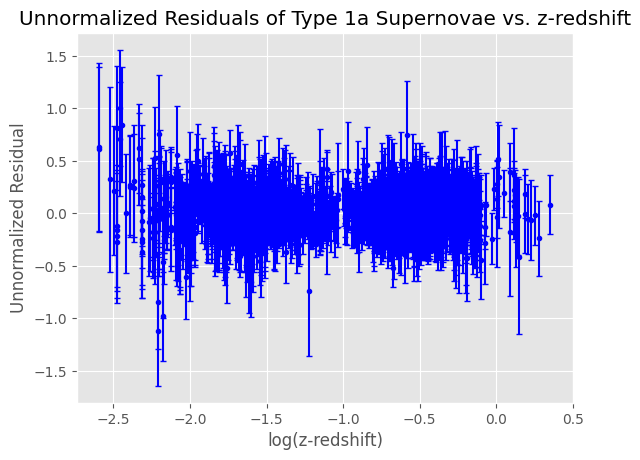

In [ ]:
#plot unnorm residuals vs. log(redshift) with error bars -> delete first two points

#yes, error is higher for lower z due to peculiar velocities. Even the people
#who colleced the data do not know why the peculiar velocities are high.

fig,ax = plt.subplots()
x_unnorm_log_cut = x_unnorm_log[2:]
y_unnorm_cut = y_unnorm[2:]

print(x_unnorm_log_cut.size)

ax.errorbar(x_unnorm_log_cut, y_unnorm_cut, yerr=shoes_mu_err[2:], fmt='bo', capsize=2, markersize=3)
plt.title("Unnormalized Residuals of Type 1a Supernovae vs. z-redshift")
plt.xlabel('log(z-redshift)')
plt.ylabel('Unnormalized Residual')
fig.show()

#no statistical analysis has been done on this yet, but it looks like there
#might be a correlation between distance from Earth and residual of LambdaCDM
#model. The residuals at smaller distances appear to be slightly higher

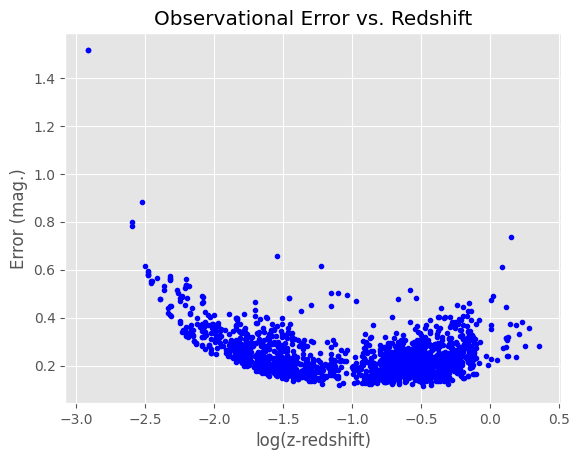

In [ ]:
#create plot of systematic errors as a function of redshift

fig,ax = plt.subplots()
x = x_unnorm_log
y = df_shoes['MU_SH0ES_ERR_DIAG'].values.astype(float)

ax.plot(x, y, 'bo', markersize=3)
plt.xlabel('log(z-redshift)')
plt.ylabel('Error (mag.)')
plt.title('Observational Error vs. Redshift')
fig.show()

[0.4398120630630629, 0.22883331383647787]
0.18708430150171185


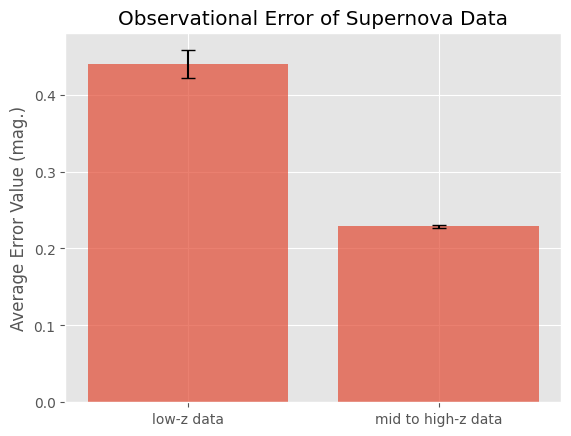

In [ ]:
#bar chart with error bars for low-z residuals vs. rest of data

def std_error(data):
  # Calculate the mean (average) of the data
  mean = sum(data) / len(data)
  squared_diff = [(x - mean)**2 for x in data]
  variance = sum(squared_diff) / (len(data) - 1)
  std_error = math.sqrt(variance) / math.sqrt(len(data))
  return std_error

low_z_sys = y[x_unnorm_log < -2.0]
other_z_sys = y[x_unnorm_log > -2.0]

categories = ["low-z data","mid to high-z data"]
means = [sum(low_z_sys)/len(low_z_sys), sum(other_z_sys)/len(other_z_sys)]
std_errors = [std_error(low_z_sys), std_error(other_z_sys)]
errors = [std_error for std_error in std_errors]

print(means)
print(np.std(low_z_sys))

plt.bar(categories, means, yerr=errors, capsize=5, alpha=0.7)

# Add labels and title
plt.ylabel("Average Error Value (mag.)")
plt.title('Observational Error of Supernova Data')

# Show the graph
plt.show()

In [ ]:
#find p-value

t_statistic, p_value = scipy.stats.ttest_ind(low_z_sys, other_z_sys)
print(p_value)

1.0945759262614827e-123


In [ ]:
def cut_zred_graph_less(threshold, x, y, err):
  x_graph = x[x < threshold]
  change = x.size - x_graph.size
  y_graph = y[:-change]
  err_graph = err[:-change]

  slope, intercept = np.polyfit(x_graph, y_graph, 1)
  best_fit_line = slope*x_graph + intercept
  print(f"slope: {slope}")

  plt.errorbar(x_graph, y_graph, yerr=err_graph, fmt='bo', capsize=2, markersize=3)
  plt.plot(x_graph, best_fit_line, color='red', label='Best-fit line')  # Plot the best-fit line
  plt.xlabel('log(z-redshift)')
  plt.ylabel('Residual Value (mag.)')
  plt.legend()
  plt.grid(True)
  plt.title(f"Residuals for log z < {threshold}")
  plt.show()
  return slope, x_graph, y_graph, err_graph

def cut_zred_graph_greater(threshold, x, y, err):
  x_graph = x[x > threshold]
  change = x.size - x_graph.size
  y_graph = y[change:]
  err_graph = err[change:]

  slope, intercept = np.polyfit(x_graph, y_graph, 1)
  best_fit_line = slope*x_graph + intercept
  print(f"slope: {slope}")

  plt.errorbar(x_graph, y_graph, yerr=err_graph, fmt='bo', capsize=2, markersize=3, zorder=1)
  plt.plot(x_graph, best_fit_line, color='red', label='Best-fit line', zorder=2)  # Plot the best-fit line
  plt.xlabel('log(z-redshift)')
  plt.ylabel('Residual Value (mag.)')
  plt.legend()
  plt.grid(True)
  plt.title(f"Residuals for log z > {threshold}")
  plt.show()
  return slope, x_graph, y_graph, err_graph

def cut_zred_graph_both(low, high, x, y, err):
  x_graph = x[(x > low)]
  change_low = x.size - x_graph.size
  x_graph = x_graph[(x_graph < high)]
  change_high = x.size - x_graph.size - change_low
  y_graph = y[change_low:-change_high]
  err_graph = err[change_low:-change_high]


  slope, intercept = np.polyfit(x_graph, y_graph, 1)
  best_fit_line = slope*x_graph + intercept
  print(f"slope: {slope}")

  plt.errorbar(x_graph, y_graph, yerr=err_graph, fmt='bo', capsize=2, markersize=3)
  plt.plot(x_graph, best_fit_line, color='red', label='Best-fit line')  # Plot the best-fit line
  plt.xlabel('log(z-redshift)')
  plt.ylabel('Residuals Value (mag.)')
  plt.legend()
  plt.grid(True)
  plt.title(f"Residuals for {low} < log z < {high}")
  plt.show()
  return slope, x_graph, y_graph, err_graph

slope: -0.8112073544921787


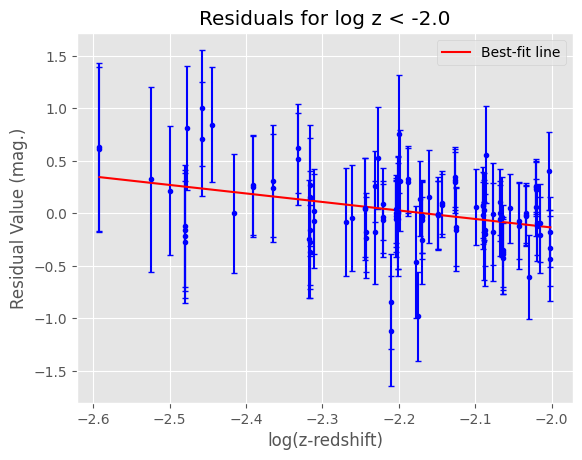

slope: 0.0004351972404120791


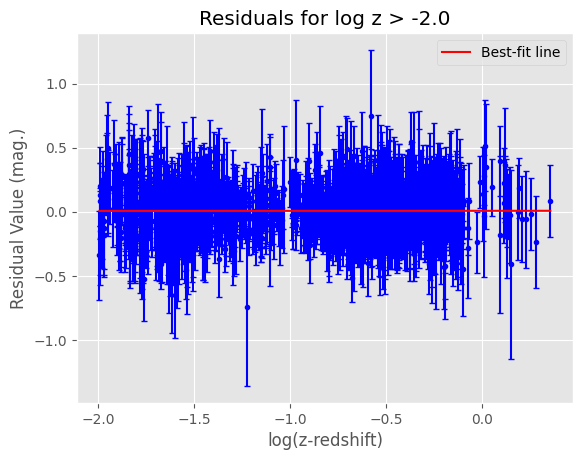

In [ ]:
#calculate slopes again for two groups with the two deleted ones

slope_under, x_under, y_under, under_err = cut_zred_graph_less(-2.0, x_unnorm_log_cut, y_unnorm_cut, shoes_mu_err[2:])
slope_over, x_over, y_over, over_err = cut_zred_graph_greater(-2.0, x_unnorm_log_cut, y_unnorm_cut, shoes_mu_err[2:])

In [ ]:
r, _ = pearsonr(x_under, y_under)

# Display the r-value
print(f"Correlation coefficient (r-value): {r:.2f}")

Correlation coefficient (r-value): -0.35


slope: 0.005016233023957276


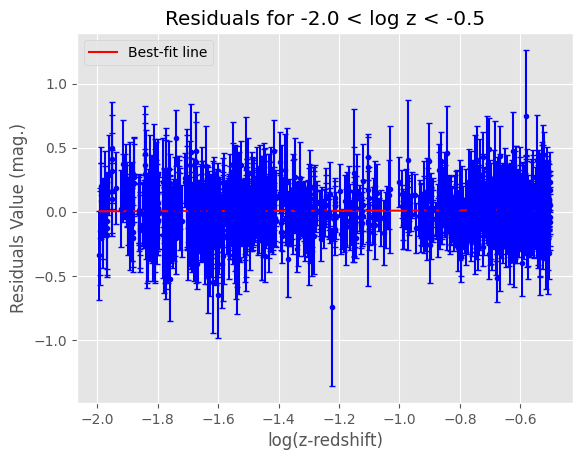

slope: -0.025187502428765603


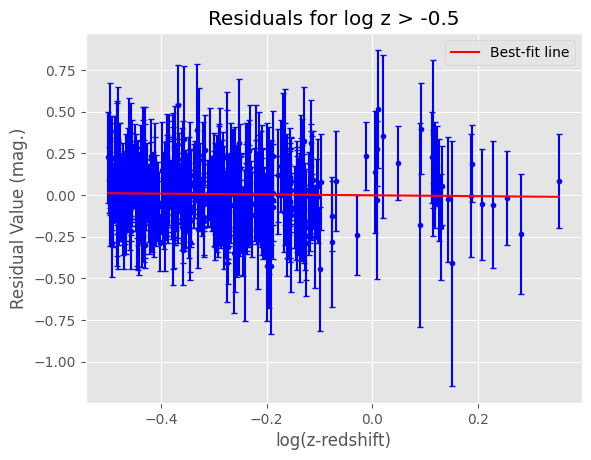

In [ ]:
slope_mid, x_mid, y_mid, mid_err = cut_zred_graph_both(-2.0, -0.5, x_unnorm_log_cut, y_unnorm_cut, shoes_mu_err[2:])
slope_high, x_high, y_high, high_err = cut_zred_graph_greater(-0.5, x_unnorm_log_cut, y_unnorm_cut, shoes_mu_err[2:])

slope: 0.005016233023957276


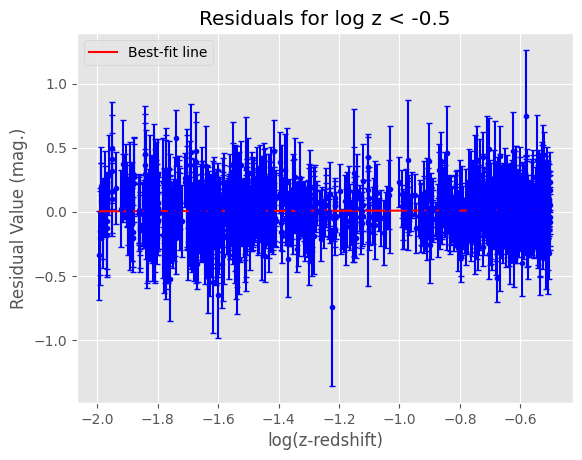

slope: -0.13038468451283566


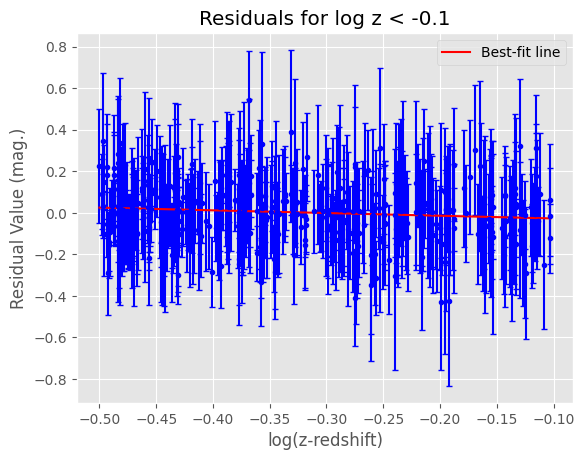

slope: 0.0018663192674345413


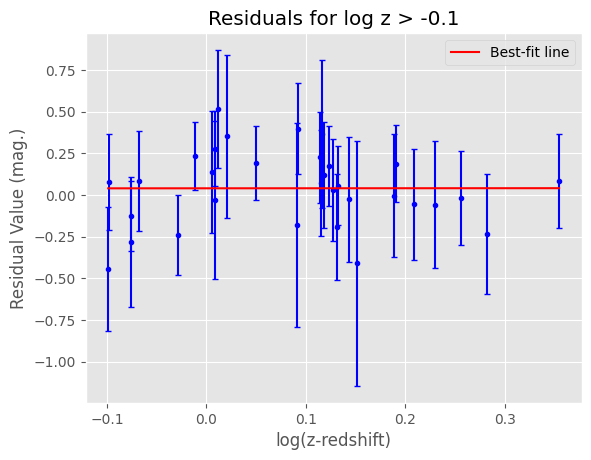

In [ ]:
slope_mid, x_mid, y_mid, mid_err = cut_zred_graph_less(-0.5, x_over, y_over, over_err)
slope_lhigh, x_lhigh, y_lhigh, lhigh_err = cut_zred_graph_less(-0.1, x_high, y_high, high_err)
slope_hhigh, x_hhigh, y_hhigh, hhigh_err = cut_zred_graph_greater(-0.1, x_high, y_high, high_err)

slope: 0.007410653753405873


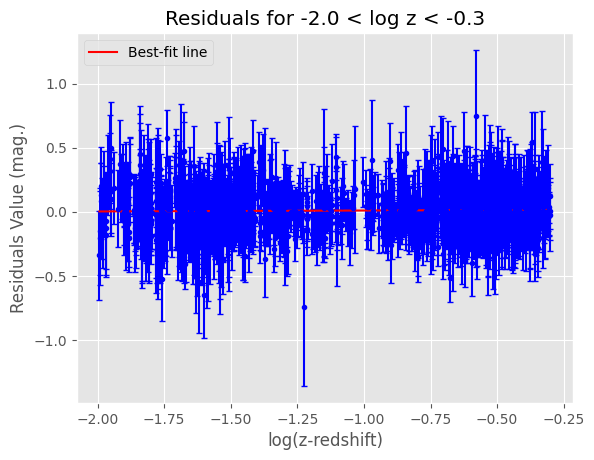

In [ ]:
slope_cosmo, x_cosmo, y_cosmo, cosmo_err = cut_zred_graph_both(-2.0, -0.3, x_unnorm_log_cut, y_unnorm_cut, shoes_mu_err[2:])

slope: 0.0004351972404120791


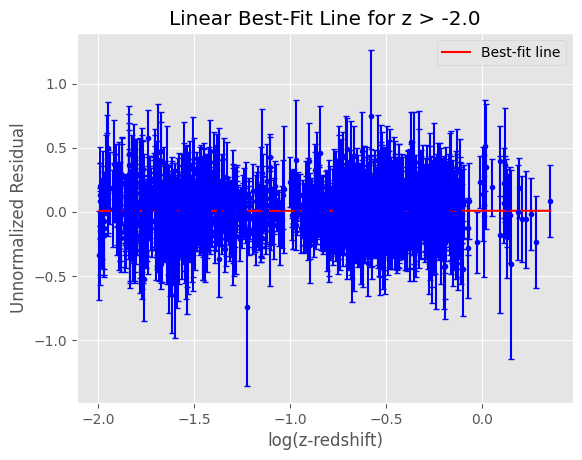

In [ ]:
#create a linear fit to the graph for unnorm residuals after subtracting out the
#points with the lowest z-redshift, see how slope changes

threshold = -2 #threshold z-redshift value
filtered_x_unnorm_log = x_unnorm_log[x_unnorm_log >= threshold]
change = x_unnorm_log.size - filtered_x_unnorm_log.size
filtered_y_unnorm = y_unnorm[change:]
filtered_shoes_mu_err = shoes_mu_err[change:]

slope, intercept = np.polyfit(filtered_x_unnorm_log, filtered_y_unnorm, 1)  # 1 represents a linear fit

best_fit_line = slope * filtered_x_unnorm_log + intercept

print(f"slope: {slope}")

plt.errorbar(filtered_x_unnorm_log, filtered_y_unnorm, yerr=filtered_shoes_mu_err, fmt='bo', capsize=2, markersize=3)
plt.plot(filtered_x_unnorm_log, best_fit_line, color='red', label='Best-fit line')  # Plot the best-fit line
plt.xlabel('log(z-redshift)')
plt.ylabel('Unnormalized Residual')
plt.legend()
plt.grid(True)
plt.title('Linear Best-Fit Line for z > -2.0')
plt.show()

slope: 0.14941232488207848


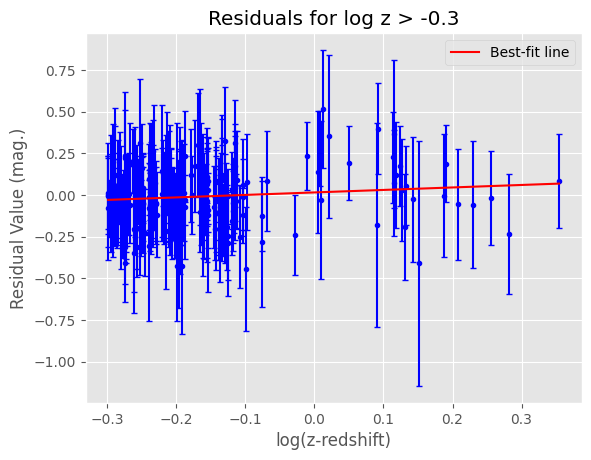

208


In [ ]:
slope_high, x_high, y_high, err_high = cut_zred_graph_greater(-0.3, x_unnorm_log_cut, y_unnorm_cut, shoes_mu_err[2:])
print(len(x_high))

In [ ]:
#do a t-test to see if difference in slope is significant
#p = 8.18*10^-6!!!

# Fit linear regression model
filtered_x_unnorm_log = sm.add_constant(filtered_x_unnorm_log)
model = sm.OLS(filtered_y_unnorm, filtered_x_unnorm_log).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004041
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.949
Time:                        02:33:48   Log-Likelihood:                 726.53
No. Observations:                1590   AIC:                            -1449.
Df Residuals:                    1588   BIC:                            -1438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.007      1.018      0.3

In [ ]:
#do a t-test for the new linear regression with omitting the first two points
#

# Fit linear regression model
x_under = sm.add_constant(x_under)
model = sm.OLS(y_under, x_under).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     15.26
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           0.000165
Time:                        02:33:50   Log-Likelihood:                -29.265
No. Observations:                 109   AIC:                             62.53
Df Residuals:                     107   BIC:                             67.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7562      0.457     -3.843      0.0

In [ ]:
#create separate LambdaCDM model just for the low-z data, find its new H0.

#LambdaCDM model
model = FlatLambdaCDM(H0=70, Om0=0.334)

#get np arrays for each stat
shoes_zred = df_shoes['zHD'].values
shoes_mu = df_shoes['MU_SH0ES'].values
shoes_mu_err = df_shoes['MU_SH0ES_ERR_DIAG'].values
shoes_zred = shoes_zred.astype(float)
shoes_mu = shoes_mu.astype(float)
shoes_mu_err = shoes_mu_err.astype(float)

shoes_zred_low = shoes_zred[shoes_zred < 0.01]
shoes_mu_low = shoes_mu[shoes_zred < 0.01]
shoes_mu_err_low = shoes_mu_err[shoes_zred < 0.01]

print(shoes_zred_low)

#define the loss function for gradient descent (chi-square)
def chi_square_loss(params):
    H0, Om0 = params
    model = FlatLambdaCDM(H0=H0, Om0=Om0)
    luminosity_distances = model.luminosity_distance(shoes_zred_low)
    mu_pred = 5 * np.log10(luminosity_distances.value) + 25
    chi2 = np.sum(((shoes_mu_low - mu_pred) / shoes_mu_err_low) ** 2)
    return chi2

#initial guess for H0 and Om0 using Brout 2022
initial_params = np.array([73.6, 0.334])

# Add bounds for Om0 (it should be in the range [0, 1])
bounds = ((None, None), (0.0, 1.0))

# minimize the chi-square loss using gradient descent with bounds
result = minimize(chi_square_loss, initial_params, method='L-BFGS-B', bounds=bounds)

#extract the optimized parameters
optimal_params = result.x
H0_optimal, Om0_optimal = optimal_params

print("Optimal H0:", H0_optimal)
print("Optimal Om0:", Om0_optimal)
print("Optimal Chi-squared value:", result.fun)

[0.00122 0.00122 0.00256 0.00256 0.00299 0.00317 0.00331 0.00331 0.00331
 0.00331 0.00333 0.00349 0.00349 0.00359 0.00384 0.00407 0.00407 0.00432
 0.00432 0.00465 0.00465 0.00482 0.00483 0.00483 0.00483 0.00483 0.00483
 0.00488 0.00488 0.00538 0.00548 0.0057  0.0057  0.00571 0.00571 0.00587
 0.00588 0.00592 0.00602 0.00602 0.00602 0.00616 0.00616 0.00625 0.00625
 0.00625 0.00625 0.0063  0.0063  0.0063  0.00631 0.00634 0.00648 0.00648
 0.00665 0.00668 0.00673 0.00676 0.00677 0.00677 0.00677 0.00692 0.0071
 0.0071  0.0071  0.00719 0.00719 0.00747 0.00747 0.00747 0.0075  0.0075
 0.00795 0.00814 0.00814 0.00814 0.00815 0.00815 0.00815 0.00817 0.00818
 0.00821 0.00838 0.00838 0.00855 0.00855 0.00857 0.00861 0.00863 0.00863
 0.00863 0.00864 0.00883 0.00906 0.00906 0.00925 0.00925 0.00925 0.00935
 0.00954 0.00954 0.00954 0.00954 0.00957 0.00957 0.00966 0.00966 0.00993
 0.00996 0.00996 0.00996]
Optimal H0: 72.13530347001289
Optimal Om0: 1.0
Optimal Chi-squared value: 60.39554373093934


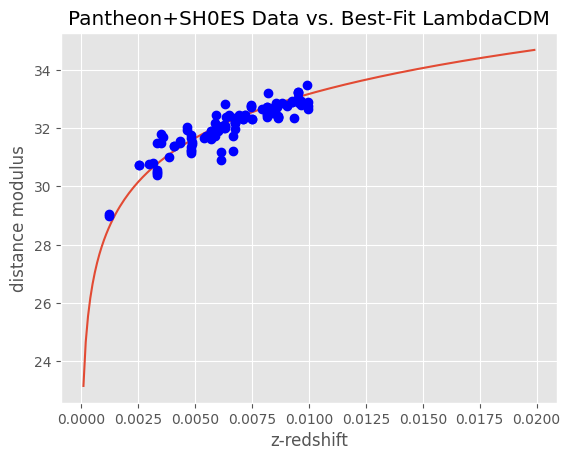

In [ ]:
#visualizing LambdaCDM model

model_low = FlatLambdaCDM(H0=H0_optimal, Om0=Om0_optimal)

#x = z-redshift
x = np.arange(0.0001, 0.02, 0.0001)
luminosity_distances = model.luminosity_distance(x)
#y = distance modulus
y = []
for element in luminosity_distances:
  y = np.append(y, 5 * np.log10(element.value) + 25)

#render the chart
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(x,y)
ax.set_title('Pantheon+SH0ES Data vs. Best-Fit LambdaCDM')
ax.set_xlabel('z-redshift')
ax.set_ylabel('distance modulus')

ax.plot(shoes_zred[shoes_zred < 0.01], shoes_mu[shoes_zred < 0.01], 'bo')
fig.show()

Optimal H0: 73.00238822985524
Optimal Om0: 0.3492975835478401
Optimal Chi-squared value: 684.5997294404417


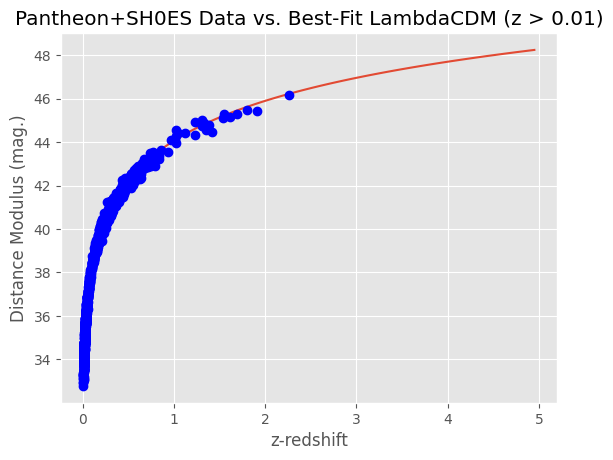

In [ ]:
#visualizing LambdaCDM model for log(z) > 0.01

shoes_zred_nonlow = shoes_zred[shoes_zred > 0.01]
shoes_mu_nonlow = shoes_mu[shoes_zred > 0.01]
shoes_mu_err_nonlow = shoes_mu_err[shoes_zred > 0.01]

#define the loss function for gradient descent (chi-square)
def chi_square_loss(params):
    H0, Om0 = params
    model = FlatLambdaCDM(H0=H0, Om0=Om0)
    luminosity_distances = model.luminosity_distance(shoes_zred_nonlow)
    mu_pred = 5 * np.log10(luminosity_distances.value) + 25
    chi2 = np.sum(((shoes_mu_nonlow - mu_pred) / shoes_mu_err_nonlow) ** 2)
    return chi2

#initial guess for H0 and Om0 using Brout 2022
initial_params = np.array([73.6, 0.334])

# Add bounds for Om0 (it should be in the range [0, 1])
bounds = ((None, None), (0.0, 1.0))

# minimize the chi-square loss using gradient descent with bounds
result = minimize(chi_square_loss, initial_params, method='L-BFGS-B', bounds=bounds)

#extract the optimized parameters
optimal_params = result.x
H0_optimal, Om0_optimal = optimal_params

print("Optimal H0:", H0_optimal)
print("Optimal Om0:", Om0_optimal)
print("Optimal Chi-squared value:", result.fun)

model_high = FlatLambdaCDM(H0=H0_optimal, Om0=Om0_optimal)

#x = z-redshift
x = np.arange(0.05, 5, 0.05)
luminosity_distances = model.luminosity_distance(x)
#y = distance modulus
y = []
for element in luminosity_distances:
  y = np.append(y, 5 * np.log10(element.value) + 25)

#render the chart
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(x,y)
ax.set_title('Pantheon+SH0ES Data vs. Best-Fit LambdaCDM (z > 0.01)')
ax.set_xlabel('z-redshift')
ax.set_ylabel('Distance Modulus (mag.)')

ax.plot(shoes_zred[shoes_zred > 0.01], shoes_mu[shoes_zred > 0.01], 'bo')
fig.show()

In [ ]:
errs = df_shoes['MU_SH0ES_ERR_DIAG'].values.astype(float)
errs_high = errs[x_unnorm_log > -2.0]
print(errs_high)

std_high = sum(errs_high)/len(errs_high)/np.sqrt(1590)
print(std_high)

[0.348547 0.365223 0.341878 ... 0.281981 0.358642 0.281309]
0.005738794688683143


[28.50200297 28.50200297 30.11354154 30.11354154 30.45138276 30.57860978
 30.67267633 30.67267633 30.67267633 30.67267633 30.68578937 30.78795001
 30.78795001 30.84945425 30.99603587 31.12271757 31.12271757 31.2525617
 31.2525617  31.41293212 31.41293212 31.49117258 31.49568892 31.49568892
 31.49568892 31.49568892 31.49568892 31.51813179 31.51813179 31.73073778
 31.77088787 31.85670835 31.85670835 31.86053047 31.86053047 31.92079417
 31.92450615 31.93929148 31.97582394 31.97582394 31.97582394 32.02596696
 32.02596696 32.05760612 32.05760612 32.05760612 32.05760612 32.07498802
 32.07498802 32.07498802 32.07844791 32.08879494 32.13644548 32.13644548
 32.19294795 32.20276955 32.21904174 32.2287474  32.2319731  32.2319731
 32.2319731  32.27979772 32.3358439  32.3358439  32.3358439  32.36333904
 32.36333904 32.44674057 32.44674057 32.44674057 32.45549133 32.45549133
 32.58273216 32.6343188  32.6343188  32.6343188  32.63700062 32.63700062
 32.63700062 32.64235446 32.64502649 32.65302316 32.6

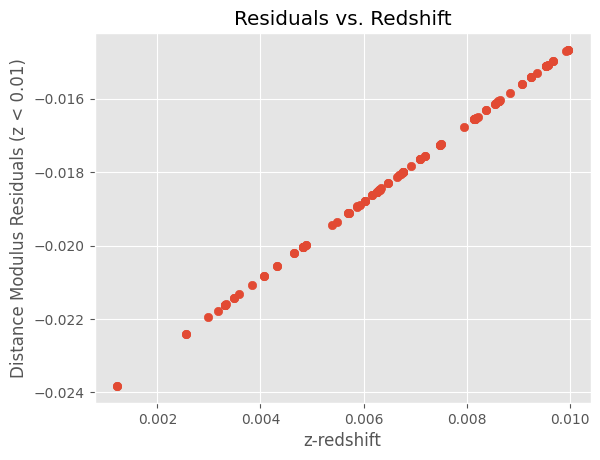

'\nthe lambdaCDM model shown is not a good fit for the low-z data because all\nthe residuals are negative and show a clear pattern. the reason why they are all\nnegative is probably that i capped omega-matter at 1.0 so the lambdaCDM model\ncannot perfectly fit the data.\n'

In [ ]:
filtered_zred = shoes_zred[shoes_zred < 0.01]
dL = model_low.luminosity_distance(filtered_zred).value
mu_model = 5 * np.log10(dL) + 25
residuals = mu_pred[shoes_zred < 0.01] - mu_model
print(mu_pred[shoes_zred < 0.01])
print(mu_model)
print(residuals)

plt.scatter(filtered_zred, residuals)
plt.xlabel('z-redshift')
plt.ylabel('Distance Modulus Residuals (z < 0.01)')
plt.title('Residuals vs. Redshift')
plt.grid(True)
plt.show()

'''
the lambdaCDM model shown is not a good fit for the low-z data because all
the residuals are negative and show a clear pattern. the reason why they are all
negative is probably that i capped omega-matter at 1.0 so the lambdaCDM model
cannot perfectly fit the data.
'''

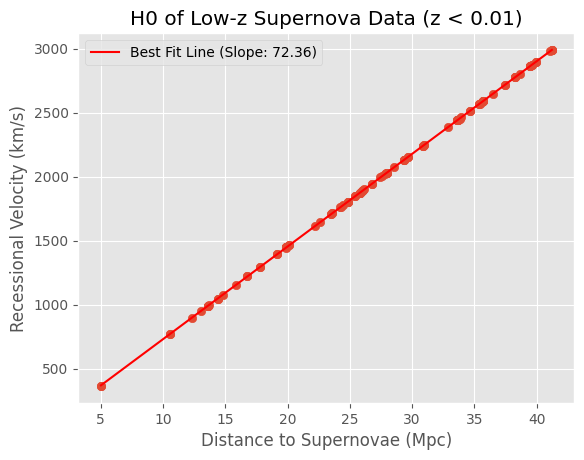

slope: 72.36145627781801


In [ ]:
#Using Hubble's Law to find H0 instead

recessional_v = filtered_zred*3*10**5
mpc_distance = (10**(mu_pred[shoes_zred < 0.01]/5 + 1))/1000000

plt.scatter(mpc_distance, recessional_v)
plt.xlabel('Distance to Supernovae (Mpc)')
plt.ylabel('Recessional Velocity (km/s)')
plt.title('H0 of Low-z Supernova Data (z < 0.01)')
plt.grid(True)

slope, intercept = np.polyfit(mpc_distance, recessional_v, 1)  # 1 represents a linear fit

best_fit_line = slope * mpc_distance + intercept

plt.plot(mpc_distance, best_fit_line, color='red', label=f'Best Fit Line (Slope: {slope:.2f})')

plt.legend()
plt.show()

print(f"slope: {slope}")

In [ ]:
#get error bars for the linear low-z function

errs_low = errs[x_unnorm_log < -2.0]

errorbar = sum(1/(err**2) for err in errs_low)/(slope**2)

print(errorbar)

0.14422239044808483


In [ ]:
#find sig diff between H0 for low and rest of data

#ended up doing on calc -> p=6.7*10^-74

<class 'numpy.float64'>


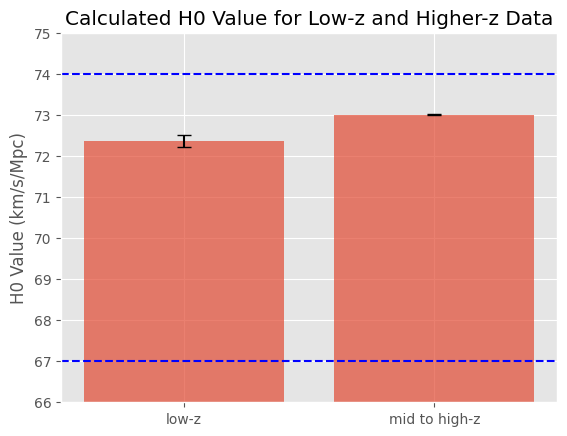

In [ ]:
#visualize using bar chart

categories = ['low-z', 'mid to high-z']
means = [slope, H0_optimal]
errors = [errorbar, std_high]
print(type(std_high))

plt.bar(categories, means, yerr=errors, capsize=5, alpha=0.7)
plt.ylabel('H0 Value (km/s/Mpc)')
plt.title('Calculated H0 Value for Low-z and Higher-z Data')
plt.ylim(66, 75)

plt.axhline(y=67, color='b', linestyle='--', label='H0 = 67')
plt.axhline(y=74, color='b', linestyle='--', label='H0 = 74')

plt.show()

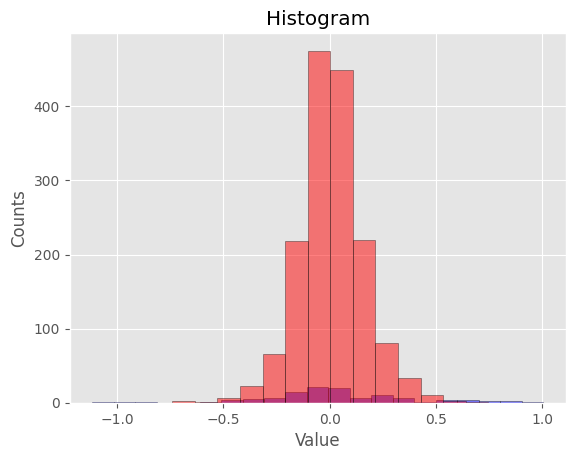

In [ ]:
#double histogram for two separate z-values

bin_size = 0.1
num_bins1 = int((y_under.max() - y_under.min()) / bin_size)
num_bins2 = int((y_over.max() - y_over.min()) / bin_size)

counts1, bins1, _ = plt.hist(y_under, bins=num_bins1, alpha=0.5, color='b', edgecolor='black')
counts2, bins2, _ = plt.hist(y_over, bins=num_bins2, alpha=0.5, color='r', edgecolor='black')

normalized_counts1 = counts1/y_under.size
normalized_counts2 = counts2/y_over.size

plt.xlabel('Value')
plt.ylabel('Counts')
plt.title(f'Histogram')

plt.show()

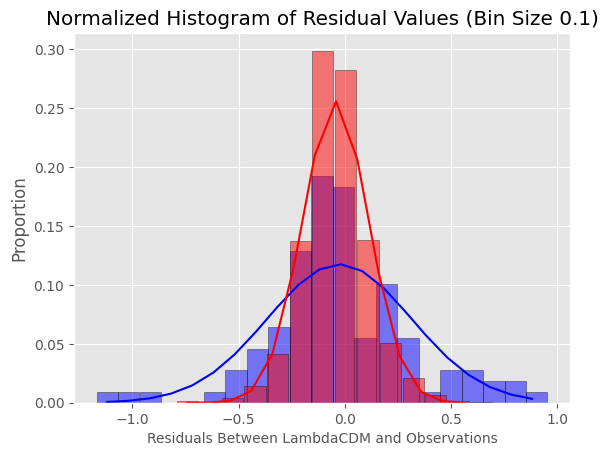

In [ ]:
# Create a bar plot using the normalized counts
plt.bar(bins1[:-1], normalized_counts1, width=bin_size, alpha=0.5, color='b', edgecolor='black')
plt.bar(bins2[:-1], normalized_counts2, width=bin_size, alpha=0.5, color='r', edgecolor='black')

plt.xlabel('Residuals Between LambdaCDM and Observations', fontsize=10)
plt.ylabel('Proportion')
plt.title(f'Normalized Histogram of Residual Values (Bin Size {bin_size})')

# get the normal distribution curves
y1 = np.arange(min(y_under), max(y_under), bin_size)
y2 = np.arange(min(y_over), max(y_over), bin_size)
mean1, std1 = np.mean(y_under), np.std(y_under)
mean2, std2 = np.mean(y_over), np.std(y_over)
cdf1 = []
for i in range (y1.size-1):
  cdf_lower = norm.cdf(y1[i], loc=mean1, scale=std1)
  cdf_upper = norm.cdf(y1[i+1], loc=mean1, scale=std1)
  cdf1.append(cdf_upper - cdf_lower)

cdf2 = []
for i in range (y2.size-1):
  cdf_lower = norm.cdf(y2[i], loc=mean2, scale=std2)
  cdf_upper = norm.cdf(y2[i+1], loc=mean2, scale=std2)
  cdf2.append(cdf_upper - cdf_lower)


plt.plot(y1[:-1], cdf1, 'b')
plt.plot(y2[:-1], cdf2, 'r')

plt.show()

In [ ]:
print(f"low-z data mean residual value: {mean1}")
print(f"mid+high-z data mean residual value: {mean2}")
print(f"low-z data std: {std1}")
print(f"mid+high-z data std: {std2}")

low-z data mean residual value: 0.024557969172066648
mid+high-z data mean residual value: 0.007090421138543025
low-z data std: 0.3383054667656775
mid+high-z data std: 0.1532207493012838


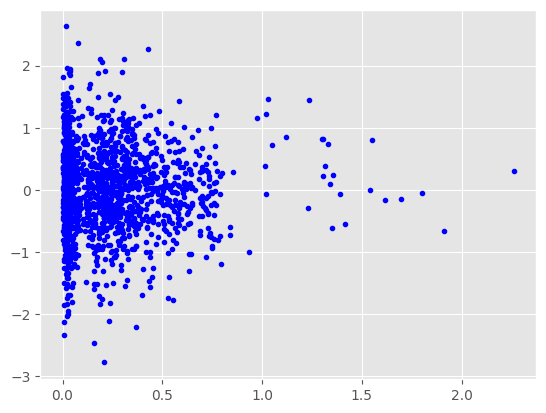

In [ ]:
#plot unnorm residuals vs. redshift, no downsampling

fig,ax = plt.subplots()
x_norm = shoes_zred
y_norm = norm_residuals

ax.plot(x_norm, y_norm, 'bo', markersize=3)
fig.show()

In [ ]:
#separate data into low, mid, and high z

low_z_vals = x_unnorm_log[x_unnorm_log < -2.0]
mid_z_vals = x_unnorm_log[(x_unnorm_log > -2.0) & (x_unnorm_log < np.log10(0.5))]
high_z_vals = x_unnorm_log[x_unnorm_log > np.log10(0.5)]

print(f"{low_z_vals[0]} {mid_z_vals[0]} {high_z_vals[0]}") #works

low_z_residuals = unnorm_residuals[x_unnorm_log < -2.0]
mid_z_residuals =  unnorm_residuals[(x_unnorm_log > -2.0) & (x_unnorm_log < np.log10(0.5))]
high_z_residuals = unnorm_residuals[x_unnorm_log > np.log10(0.5)]

print(f"{low_z_residuals[0]} {mid_z_residuals[0]} {high_z_residuals[0]}") #works

-2.9136401693252516 -1.9931062920520994 -0.30044843061984716
0.4966970317344064 -0.33945212278936054 0.11999917835876062


In [ ]:
ra_lmc = 80.8917
dec_lmc = 69.75
ra_smc = 13.1875
dec_smc = -72.82
ra_ngc = 184.7417
dec_ngc = 47.3

In [ ]:
#convert to galactic coordinates
#assume RA and Dec are in J2000.0 format (standard but never specified in data)
#use IAU 1958 system for galactic coords

def radec_to_galactic(ra, dec):
  #galactic North pole coordinates in radians for numpy
  GNP_x = np.radians(192.859)
  GNP_y = np.radians(27.128)

  #galactic longitude of the equatorial north pole
  ENP_y = np.radians(122.932)

  #convert to galactic coords, use arctan2 to avoid domain restrictions
  l = ENP_y - np.arctan2((np.cos(dec) * np.sin(ra - GNP_x)), (np.sin(dec) * np.cos(GNP_y) - np.cos(dec) * np.sin(GNP_y) * np.cos(ra - GNP_x)))
  b = np.arcsin(np.sin(dec) * np.sin(GNP_y) + np.cos(dec) * np.cos(GNP_y) * np.cos(ra - GNP_x))

  # Adjust the range of l to be between 0 and 2π
  l = (l + 2 * np.pi) % (2 * np.pi)

  return np.degrees(l), np.degrees(b)

#get right ascension and declination for map projection
ra = np.radians(pd.to_numeric(df_shoes['RA'], errors='coerce').dropna().values)
dec = np.radians(pd.to_numeric(df_shoes['DEC'], errors='coerce').dropna().values)

l_deg, b_deg = radec_to_galactic(ra, dec)

#print the results
print("RA_rad:", ra)
print("Dec_rad:", dec)
print("l_deg:", l_deg)
print("b_deg:", b_deg)

RA_rad: [3.67870028 3.67870028 3.2603274  ... 3.30425734 0.6011455  3.30141245]
Dec_rad: [ 0.94725476  0.94725476  0.16441525 ...  1.08695964 -0.09174498
  1.08750069]
l_deg: [101.98311496 101.98311496 283.89617406 ... 125.78529981 170.00849833
 125.91076218]
b_deg: [ 59.84299594  59.84299594  71.39144736 ...  54.77130523 -59.98304875
  54.73307251]


In [ ]:
l_deg_smc, b_deg_smc = radec_to_galactic(ra_smc, dec_smc)
l_deg_lmc, b_deg_lmc = radec_to_galactic(ra_lmc, dec_lmc)
l_deg_ngc, b_deg_ngc = radec_to_galactic(ra_ngc, dec_ngc)

print(l_deg_smc, b_deg_smc)

53.0584441537637 69.64050815417907


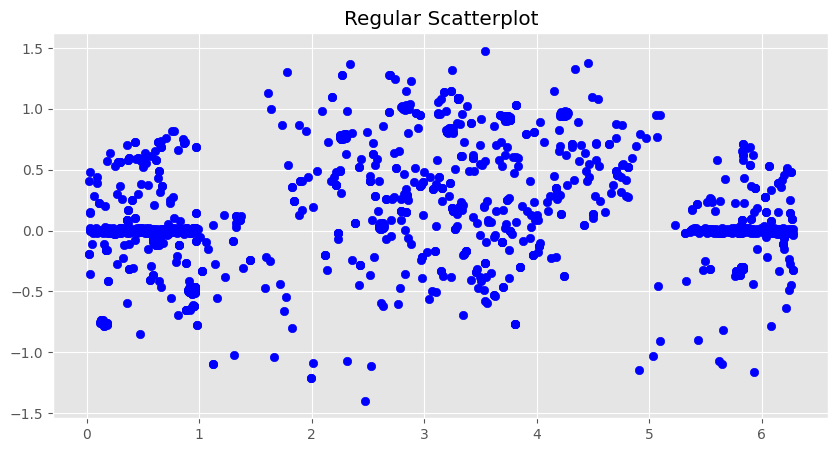

In [ ]:
#ra vs. d rectangular -> explain why there is very little data at
#certain points.

plt.figure(figsize=(10, 5))
# Create the scatter plot
plt.scatter(ra, dec, color='blue', marker='o', label='Data Points')
plt.grid(True)
plt.title('Regular Scatterplot')
plt.show()

#apparently there are a lot of values on or near the equator. that is odd.
#looking at data -> 1/3 of data is within 5 degrees of the equator.
#verified that this is correct with Microsoft Excel

In [ ]:
#verifying conversions are right -> they are

ra2 = np.array([182.028333])
dec2 = np.array([65.177289])

ra2 = np.radians(ra2)
dec2 = np.radians(dec2)

#galactic North pole coordinates in radians for numpy
GNP_x = np.radians(192.859)
GNP_y = np.radians(27.128)

#galactic longitude of the equatorial north pole
ENP_y = np.radians(122.932)

#convert to galactic coords, use arctan2 to avoid domain restrictions
l = ENP_y - np.arctan2((np.cos(dec2) * np.sin(ra2 - GNP_x)), (np.sin(dec2) * np.cos(GNP_y) - np.cos(dec2) * np.sin(GNP_y) * np.cos(ra2 - GNP_x)))
b = np.arcsin(np.sin(dec2) * np.sin(GNP_y) + np.cos(dec2) * np.cos(GNP_y) * np.cos(ra2 - GNP_x))

# Adjust the range of l to be between 0 and 2π
# l = (l + 2 * np.pi) % (2 * np.pi)

l_deg2 = np.degrees(l)
b_deg2 = np.degrees(b)

print(l_deg2)
print(b_deg2)

[130.18596422]
[51.33620357]


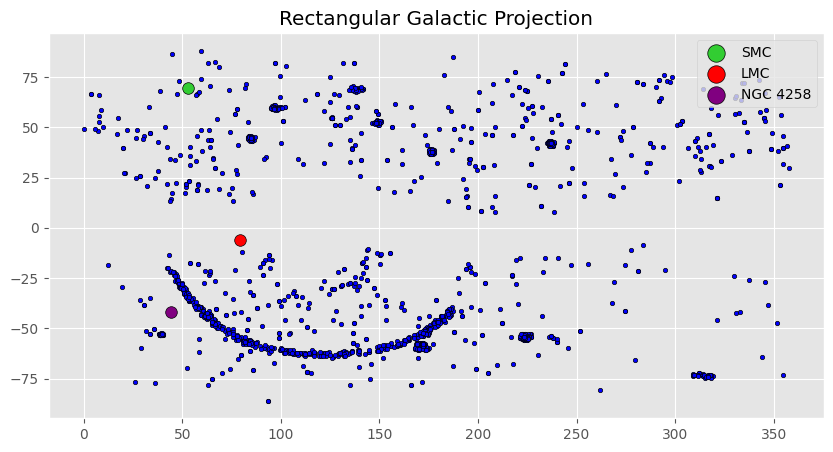

In [ ]:
#galactic coordinates rectangular plot

plt.figure(figsize=(10, 5))
plt.scatter(l_deg, b_deg, s=10, color='b', edgecolors='k')
plt.scatter(l_deg_smc, b_deg_smc, s=70, color='limegreen', edgecolors='k', label='SMC')
plt.scatter(l_deg_lmc, b_deg_lmc, s=70, color='red', edgecolors='k', label='LMC')
plt.scatter(l_deg_ngc, b_deg_ngc, s=70, color='purple', edgecolors='k', label='NGC 4258')
plt.grid(True)
plt.title('Rectangular Galactic Projection')
plt.legend(loc='upper right', markerscale=1.5)

plt.show()

#this looks correct.

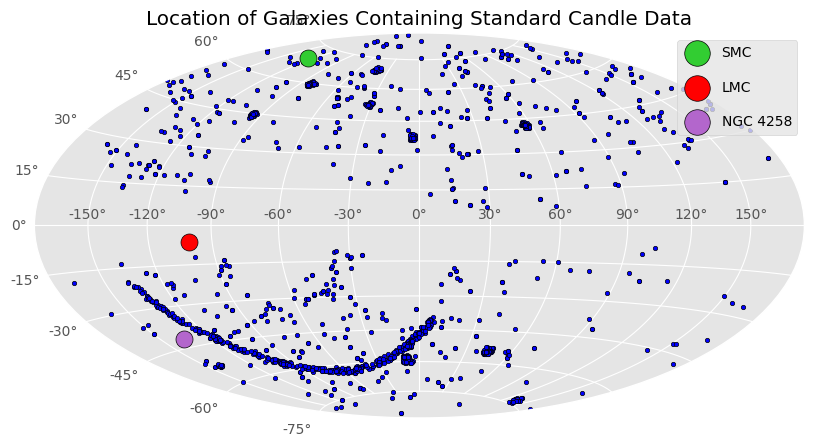

In [ ]:
#create Hammer-Aitoff Equal Area Projection for galactic coords visualization

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='hammer')

light_purple = (0.7, 0.4, 0.8)

ax.scatter(np.radians(l_deg-180), np.radians(b_deg), s=10, color='b', edgecolors='k')
ax.scatter(np.radians(l_deg_smc-180), np.radians(b_deg_smc), s=150, color='limegreen', edgecolors='k', label='SMC')
ax.scatter(np.radians(l_deg_lmc-180), np.radians(b_deg_lmc), s=150, color='red', edgecolors='k', label='LMC')
ax.scatter(np.radians(l_deg_ngc-180), np.radians(b_deg_ngc), s=150, color=light_purple, edgecolors='k', label='NGC 4258')

ax.grid(True)
ax.set_title('Location of Galaxies Containing Standard Candle Data')
ax.legend(loc='upper right', markerscale=1.5, labelspacing=1.5)

plt.show()

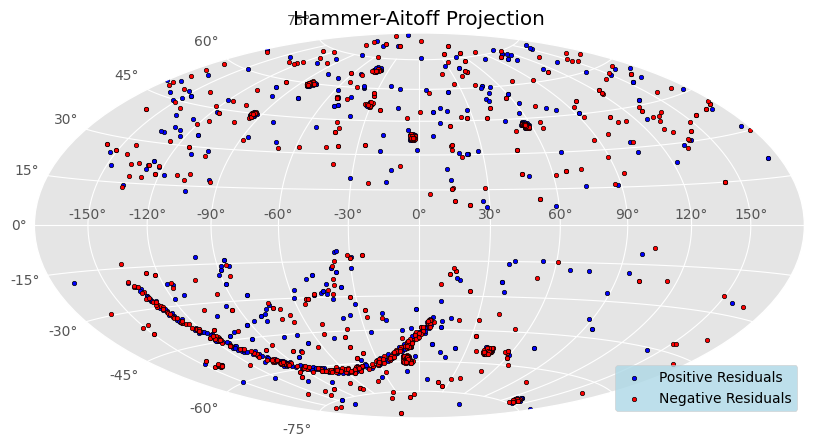

In [ ]:
#create a Hammer-Aitoff plot that changes color based on negative or
#positive residuals.

positive_mask = unnorm_residuals >= 0
negative_mask = unnorm_residuals < 0

plt.figure(figsize=(10, 5))
plt.subplot(111, projection='hammer')
plt.scatter(np.radians(l_deg[positive_mask] - 180), np.radians(b_deg[positive_mask]), s=10, color='b', edgecolors='k', label='Positive Residuals')
plt.scatter(np.radians(l_deg[negative_mask] - 180), np.radians(b_deg[negative_mask]), s=10, color='r', edgecolors='k', label='Negative Residuals')
plt.grid(True)
plt.title('Hammer-Aitoff Projection')
legend = plt.legend()
legend.get_frame().set_facecolor('lightblue')
plt.show()

#unfortunately there does not seem to exist any visual trends in the residuals
#based on galactic coordinates

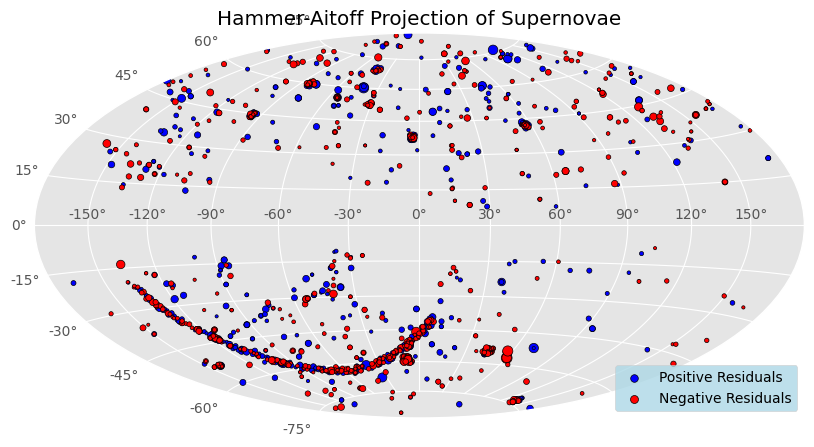

In [ ]:
'''
Creating Hammer-Aitoff plot with positive and negative residuals shown,
as well as dots with the right size (for now).

params are self explanatory -> only meant for sole purpose of this plot and to
avoid duplicated code.
'''

def create_hammer_aitoff(unnorm_residuals, l_deg, b_deg):
  #normalize the residuals to the range [0, 1]
  normalized_for_plot = unnorm_residuals/unnorm_residuals.max()

  plt.figure(figsize=(10, 5))
  plt.subplot(111, projection='hammer')

  #calculate the size of each dot based on the magnitude of the residual
  dot_size = 5 + abs(normalized_for_plot) * 50

  #scatter plot for positive residuals
  positive_mask = unnorm_residuals >= 0
  plt.scatter(
      np.radians(l_deg[positive_mask] - 180), np.radians(b_deg[positive_mask]),
      s=dot_size[positive_mask], c='b', edgecolors='k', label='Positive Residuals'
  )

  #scatter plot for negative residuals
  negative_mask = unnorm_residuals < 0
  plt.scatter(
      np.radians(l_deg[negative_mask] - 180), np.radians(b_deg[negative_mask]),
      s=dot_size[negative_mask], c='r', edgecolors='k', label='Negative Residuals'
  )

  plt.grid(True)
  plt.title('Hammer-Aitoff Projection of Supernovae')
  legend = plt.legend()
  legend.get_frame().set_facecolor('lightblue')
  plt.show()


create_hammer_aitoff(unnorm_residuals, l_deg, b_deg)

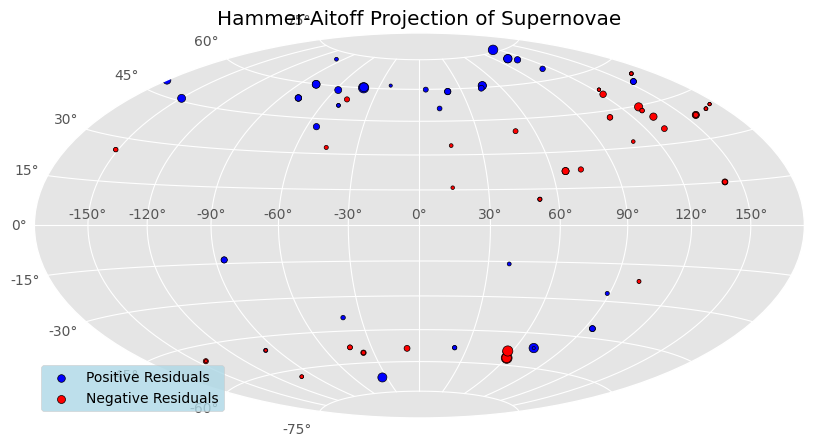

In [ ]:
#create Hammer-Aitoff projection for just low-z supernovae

l_deg_low = l_deg[x_unnorm_log < -2.0]
b_deg_low = b_deg[x_unnorm_log < -2.0]
create_hammer_aitoff(low_z_residuals, l_deg_low, b_deg_low)

In [ ]:
#calculate t-test between the positive and negative region

neg_mask_circle = (b_deg > 0) & (l_deg-180 > 0) & (b_deg < 40 + .22*(l_deg-180)) & (x_unnorm_log < -2.0)
neg_region = unnorm_residuals[neg_mask_circle]
print(neg_region)

pos_mask_circle = (b_deg > 0) & (b_deg > 40 + .22*(l_deg-180)) & (l_deg-180 > -120) & (x_unnorm_log < -2.0)
pos_region = unnorm_residuals[pos_mask_circle]
print(pos_region)

[ 0.21599022 -0.21227633 -0.11987633 -0.27137633 -0.16197633 -0.04268787
 -0.18063047 -0.23133047 -0.03542394  0.09077606 -0.06562394  0.00909388
 -0.05530612  0.04229388 -0.02390612 -0.46084795 -0.2554474  -0.0368731
 -0.0590731  -0.0271731  -0.0165439  -0.0031439  -0.0137439  -0.19685446
 -0.16102649 -0.04887498 -0.0346549  -0.3876247  -0.3675247  -0.4270247
 -0.34475523 -0.02225784 -0.01635784  0.00224216 -0.60186495  0.05875162
  0.23235162  0.24975162  0.26575162 -0.0870135  -0.1226135  -0.42966519
 -0.32956519 -0.17386519]
[ 0.49669703  0.55389703  0.60975846  0.63135846  0.32431724  1.00534999
  0.70874999  0.84744575  0.51796788  0.62006788 -0.07953778  0.05499165
  0.04179165 -0.18049417  0.25769385  0.31130506  0.32435452  0.29735452
  0.14025826  0.16070228  0.34755943  0.29555943  0.32175943  0.0059199
  0.04951003  0.40653253]


[0.34887962633629865, -0.11040457580695108]


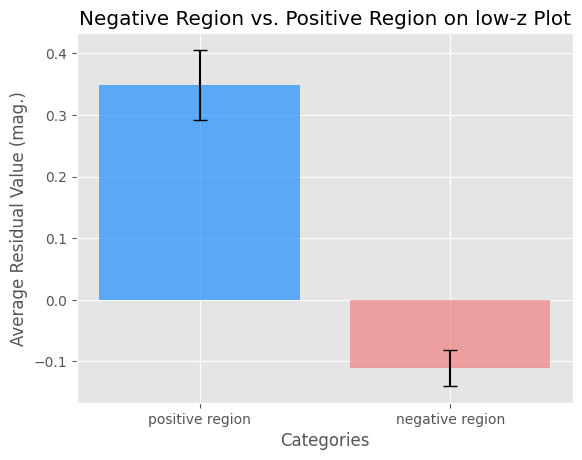

In [ ]:
categories = ["positive region","negative region"]
means = [sum(pos_region)/len(pos_region), sum(neg_region)/len(neg_region)]
std_errors = [std_error(pos_region), std_error(neg_region)]
errors = [std_error for std_error in std_errors]

colors = ['dodgerblue', 'lightcoral']
plt.bar(categories, means, yerr=errors, capsize=5, alpha=0.7, color=colors)

plt.xlabel("Categories")
plt.ylabel("Average Residual Value (mag.)")
plt.title('Negative Region vs. Positive Region on low-z Plot')

print(means)

plt.show()

In [ ]:
#t-test between negative and positive region

t_statistic, p_value = scipy.stats.ttest_ind(neg_region, pos_region)
print(p_value)

2.46688893176654e-11


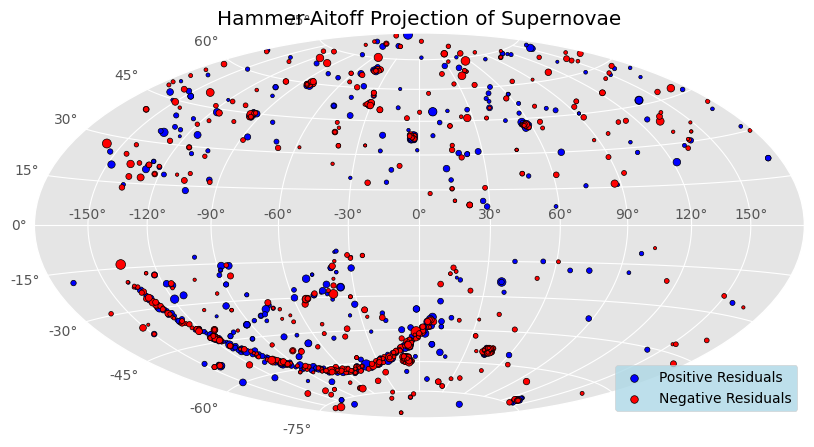

In [ ]:
#create Hammer-Aitoff projection for just mid-z supernovae

l_deg_mid = l_deg[(x_unnorm_log > -2.0) & (x_unnorm_log < np.log10(0.5))]
b_deg_mid = b_deg[(x_unnorm_log > -2.0) & (x_unnorm_log < np.log10(0.5))]
create_hammer_aitoff(mid_z_residuals, l_deg_mid, b_deg_mid)

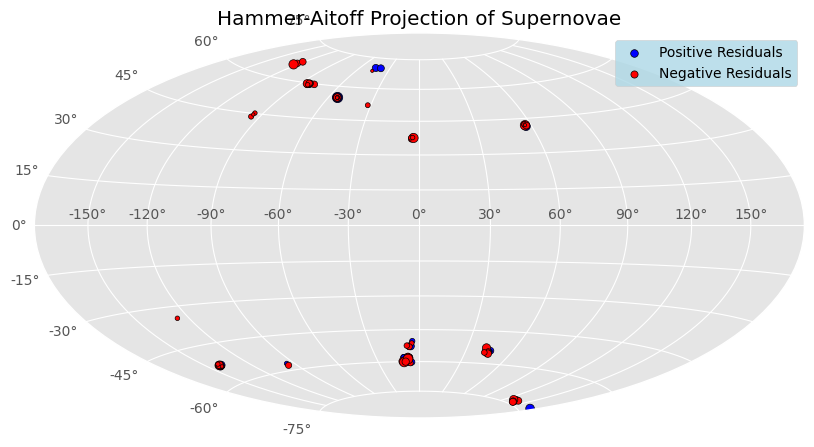

In [ ]:
#create Hammer-Aitoff projection for just high-z supernovae

l_deg_high = l_deg[x_unnorm_log > np.log10(0.5)]
b_deg_high = b_deg[x_unnorm_log > np.log10(0.5)]
create_hammer_aitoff(high_z_residuals, l_deg_high, b_deg_high)

In [ ]:
#find positive/negative residuals for northern and southern hemispheres

pos_res_north = np.sum(positive_mask & (b_deg > 0))
neg_res_north = np.sum(negative_mask & (b_deg > 0))
pos_res_south = np.sum(positive_mask & (b_deg < 0))
neg_res_south = np.sum(negative_mask & (b_deg < 0))

print(f"pos and north: {pos_res_north}")
print(f"neg and north: {neg_res_north}")
print(f"pos and south: {pos_res_south}")
print(f"neg and south: {neg_res_south}")

#there may appear to be a dipole -> there are more pos residuals in the south

pos and north: 333
neg and north: 331
pos and south: 538
neg and south: 499


In [ ]:
#repeat after splitting into 4 quadrants

pos_res_ne = np.sum(positive_mask & (b_deg > 0) & (l_deg > 180))
neg_res_ne = np.sum(negative_mask & (b_deg > 0) & (l_deg > 180))
pos_res_se = np.sum(positive_mask & (b_deg < 0) & (l_deg > 180))
neg_res_se = np.sum(negative_mask & (b_deg < 0) & (l_deg > 180))
pos_res_nw = np.sum(positive_mask & (b_deg > 0) & (l_deg < 180))
neg_res_nw = np.sum(negative_mask & (b_deg > 0) & (l_deg < 180))
pos_res_sw = np.sum(positive_mask & (b_deg < 0) & (l_deg < 180))
neg_res_sw = np.sum(negative_mask & (b_deg < 0) & (l_deg < 180))


print(f"pos and ne: {pos_res_ne}")
print(f"neg and ne: {neg_res_ne}\n")
print(f"pos and nw: {pos_res_nw}")
print(f"neg and nw: {neg_res_nw}\n")
print(f"pos and se: {pos_res_se}")
print(f"neg and se: {neg_res_se}\n")
print(f"pos and sw: {pos_res_sw}")
print(f"neg and sw: {neg_res_sw}")

#no statistical tests yet, but there appears to be *some* asymmetry and anisotropy

pos and ne: 147
neg and ne: 156

pos and nw: 186
neg and nw: 175

pos and se: 128
neg and se: 118

pos and sw: 410
neg and sw: 381


In [ ]:
#same thing, unnormalized residuals

threshold = 0

north_indices = np.where(b_deg > threshold)
south_indices = np.where(b_deg < threshold)

north_unnorm_residuals = unnorm_residuals[north_indices]
south_unnorm_residuals = unnorm_residuals[south_indices]

t_stat, p_value = stats.ttest_ind(north_unnorm_residuals, south_unnorm_residuals)

avg_north = np.mean(north_unnorm_residuals)
avg_south = np.mean(south_unnorm_residuals)

sd_north = np.std(north_unnorm_residuals)
sd_south = np.std(south_unnorm_residuals)

print(f"avg \n north: {avg_north} south: {avg_south}")
print(f"sd \n north: {sd_north} south: {sd_south}")

print(f"t: {t_stat} \n p-value: {p_value}")

#this is minimized using chi^2, so the residuals would not add up to 0.

avg 
 north: 0.00829442139508149 south: 0.00915495323738995
sd 
 north: 0.1811521527267596 south: 0.16601169961322684
t: -0.10055440710491331 
 p-value: 0.9199160549902101


In [ ]:
#do t-tests on N vs. S asymmetry for unnorm residuals

threshold = 0

north_indices = np.where(b_deg > threshold)
south_indices = np.where(b_deg < threshold)

north_unnorm_residuals = unnorm_residuals[north_indices]
south_unnorm_residuals = unnorm_residuals[south_indices]

t_stat, p_value = stats.ttest_ind(north_unnorm_residuals, south_unnorm_residuals)

print(f"t: {t_stat} \n p-value: {p_value}")

t: -0.10055440710491331 
 p-value: 0.9199160549902101


In [ ]:
#do t-tests on each pair of the 4 quadrants but for unnorm residuals

ne_indices = np.where((b_deg > threshold) & (l_deg-180 > threshold))
nw_indices = np.where((b_deg > threshold) & (l_deg-180 < threshold))
se_indices = np.where((b_deg < threshold) & (l_deg-180 > threshold))
sw_indices = np.where((b_deg < threshold) & (l_deg-180 < threshold))

ne_unnorm_residuals = unnorm_residuals[ne_indices]
nw_unnorm_residuals = unnorm_residuals[nw_indices]
sw_unnorm_residuals = unnorm_residuals[sw_indices]
se_unnorm_residuals = unnorm_residuals[se_indices]

quadrants = [ne_unnorm_residuals, nw_unnorm_residuals, sw_unnorm_residuals, se_unnorm_residuals]

for i in range(len(quadrants)):
    for j in range(i + 1, len(quadrants)):
        qx = quadrants[i]
        qy = quadrants[j]
        t_stat, p_value = stats.ttest_ind(qx, qy)
        print(f"T-Test between quadrant {i+1} and quadrant {j+1}:")
        print("T-Statistic:", t_stat)
        print("P-Value:", p_value)

#slightly better but still not statistically significant

T-Test between quadrant 1 and quadrant 2:
T-Statistic: -1.1444446814914166
P-Value: 0.25285288341172557
T-Test between quadrant 1 and quadrant 3:
T-Statistic: -1.0950665214999689
P-Value: 0.27372896012922104
T-Test between quadrant 1 and quadrant 4:
T-Statistic: -0.08826788670415868
P-Value: 0.9296960673328385
T-Test between quadrant 2 and quadrant 3:
T-Statistic: 0.376852383514865
P-Value: 0.7063528332967626
T-Test between quadrant 2 and quadrant 4:
T-Statistic: 0.9676788627607394
P-Value: 0.3335914462652476
T-Test between quadrant 3 and quadrant 4:
T-Statistic: 0.8905327661437294
P-Value: 0.37338683811015216


In [ ]:
thresholds_l = [0,90,180,270,360]
thresholds_b = [-90,0,90]

#list of numpy arrays -> each numpy array is a bin in a grid of coordinates
bins = []

#iterate through the thresholds and split the array at each threshold
for i in range(len(thresholds_l) - 1):
    for j in range(len(thresholds_b) - 1):
      condition = ((l_deg > thresholds_l[i]) & (l_deg < thresholds_l[i+1])) & ((b_deg > thresholds_b[j]) & (b_deg < thresholds_b[j+1]))
      vals = unnorm_residuals[condition]
      bins.append(vals)

for i in range(len(bins)):
  for j in range(i+1, len(bins)):
    t_statistic, p_value = scipy.stats.ttest_ind(bins[i], bins[j])
    print(f"P-Value: {p_value} between groups {i} and {j}")

#the lowest p-values are around 0.05-0.10

P-Value: 0.1704087532606974 between groups 0 and 1
P-Value: 0.18597933149007187 between groups 0 and 2
P-Value: 0.7051767147311323 between groups 0 and 3
P-Value: 0.25291561890347214 between groups 0 and 4
P-Value: 0.3254082577735977 between groups 0 and 5
P-Value: 0.27883794988635024 between groups 0 and 6
P-Value: 0.08193397336981875 between groups 0 and 7
P-Value: 0.5800540813846846 between groups 1 and 2
P-Value: 0.13145966559925423 between groups 1 and 3
P-Value: 0.8095064907266375 between groups 1 and 4
P-Value: 0.6246063505170889 between groups 1 and 5
P-Value: 0.9606759258306415 between groups 1 and 6
P-Value: 0.6868885030900385 between groups 1 and 7
P-Value: 0.111282898490491 between groups 2 and 3
P-Value: 0.8100150824184109 between groups 2 and 4
P-Value: 0.9585024794568471 between groups 2 and 5
P-Value: 0.6479433145678981 between groups 2 and 6
P-Value: 0.2833936439896754 between groups 2 and 7
P-Value: 0.18836674646851892 between groups 3 and 4
P-Value: 0.225204669781682

In [ ]:
for i in range(len(bins)):
  for j in range(i+1, len(bins)):
    t_statistic, p_value = scipy.stats.ttest_ind(bins[i], bins[j])
    if(p_value < 0.1):
      print(f"P-Value: {p_value} between groups {i} and {j}")

#the lowest p-values are around 0.05-0.10

P-Value: 0.08193397336981875 between groups 0 and 7
P-Value: 0.07120943045919868 between groups 3 and 7


In [ ]:
#rotate plot by 2 degrees and get bins each time -> use to find p-values

#new_thresholds_l = thresholds_l

def sliding_plot(l_deg, b_deg, unnorm_residuals):
  sliding_bins = []

  for rotation in range(0, 90, 2):
    new_thresholds_l = [threshold+rotation for threshold in thresholds_l]
    new_l_deg = np.where(l_deg < rotation, l_deg + 360, l_deg)
    cur_bins = []
    for i in range(len(new_thresholds_l) - 1):
      for j in range(len(thresholds_b) - 1):
        condition = ((new_l_deg > new_thresholds_l[i]) & (new_l_deg < new_thresholds_l[i+1])) & ((b_deg > thresholds_b[j]) & (b_deg < thresholds_b[j+1]))
        vals = unnorm_residuals[condition]
        cur_bins.append(vals)
    sliding_bins.append(cur_bins)

  lowest_p = 1
  lowest_index = -1;
  lowest_text = "";

  index = 0
  for bins in sliding_bins:
    for i in range(len(bins)):
      for j in range(i+1, len(bins)):
        t_statistic, p_value = scipy.stats.ttest_ind(bins[i], bins[j])
        if(p_value < lowest_p):
          lowest_p = p_value
          lowest_index = index
          lowest_text = f"{i} {j}"
    index = index+2

  return lowest_p, lowest_index, lowest_text

lowest_p, lowest_index, lowest_text = sliding_plot(l_deg, b_deg, unnorm_residuals)
print(f"lowest p-value: {lowest_p} \n index: {lowest_index} \n {lowest_text}")


lowest p-value: 0.0016871341750061021 
 index: 8 
 1 3


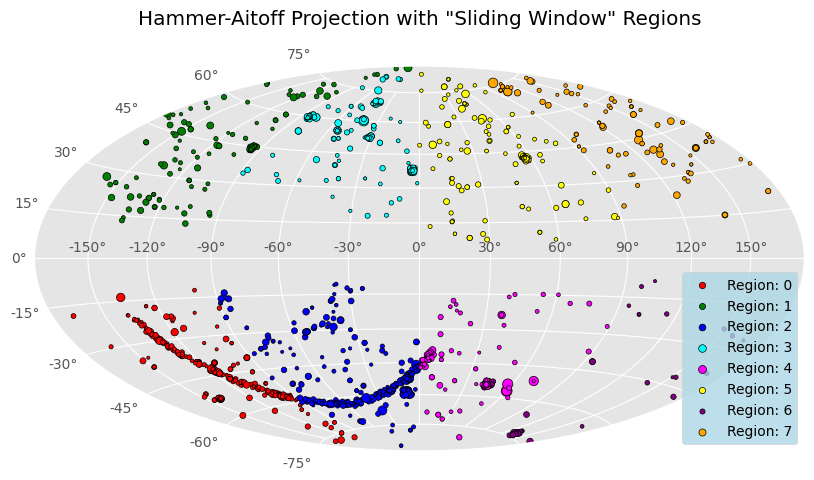

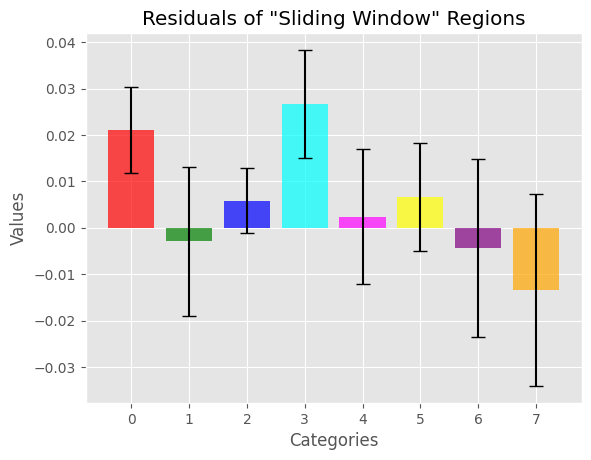

In [ ]:
'''
Creating the plot for arbitrary number of regions in the sky
shading the different regions for better visualization and clarity for other plots
'''

def std_error(data):
  # Calculate the mean (average) of the data
  mean = sum(data) / len(data)
  squared_diff = [(x - mean)**2 for x in data]
  variance = sum(squared_diff) / (len(data) - 1)
  std_error = math.sqrt(variance) / math.sqrt(len(data))
  return std_error

def create_arbitrary_skyplot(thresholds_l, unnorm_residuals, l_deg, b_deg):
  fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': 'hammer'})
  regions = []

  #normalize the residuals to the range [0, 1]
  normalized_for_plot = unnorm_residuals/unnorm_residuals.max()

  #calculate the size of each dot based on the magnitude of the residual
  dot_size = 5 + abs(normalized_for_plot) * 50


  #define colors for each region
  colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'purple', 'orange']
  count = 0

  for i in range(len(thresholds_l) - 1):
      for j in range(len(thresholds_b) - 1):
        lower_i, higher_i = thresholds_l[i], thresholds_l[i+1]
        lower_j, higher_j = thresholds_b[j], thresholds_b[j+1]
        region = (l_deg > lower_i) & (l_deg < higher_i) & (b_deg > lower_j) & (b_deg < higher_j)
        regions.append(unnorm_residuals[region])
        ax.scatter(
            np.radians((l_deg[region]%360)-180), np.radians(b_deg[region]),
            s=dot_size[region], c=colors[count], edgecolors='k',
            label=f"Region: {count}"
        )
        #print((l_deg[region]%360)-180)
        count = count+1

  ax.grid(True)
  ax.set_title('Hammer-Aitoff Projection with "Sliding Window" Regions', pad=30)
  legend = ax.legend()
  legend.get_frame().set_facecolor('lightblue')
  plt.show()

  return regions

#create bar graph for each group with error bars
def create_arbitrary_errorbars(regions, unnorm_residuals):
  categories = ["0","1","2","3","4","5","6","7"]
  means = [sum(region)/len(region) for region in regions]
  std_errors = [std_error(region) for region in regions]
  errors = [std_error for std_error in std_errors]

  colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'purple', 'orange']

  plt.bar(categories, means, yerr=errors, capsize=5, color=colors, alpha=0.7)

  # Add labels and title
  plt.xlabel("Categories")
  plt.ylabel("Values")
  plt.title('Residuals of "Sliding Window" Regions')

  # Show the graph
  plt.show()

#create bar graph for each group with error bars
def create_arbitrary_errorbars2(regions, unnorm_residuals):
  categories = ["0","1","2","3","4","5","6","7"]
  means = [sum(region)/len(region) for region in regions]
  std_errors = [std_error(region) for region in regions]
  errors = [std_error for std_error in std_errors]

  colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'purple', 'orange']

  plt.figure(figsize=(10, 5))
  for i, (x, y, error, color) in enumerate(zip(categories, means, errors, colors)):
    plt.errorbar(x, y, yerr=error, fmt='o', markersize=10, label=f'Category {i}', color=color, ecolor='black')


  # Add labels and title
  plt.xlabel("Regions")
  plt.ylabel("Avg. Residual Value (mag.)")
  plt.title('Residuals of "Sliding Window" Regions')

  # Show the graph
  plt.show()

regions = create_arbitrary_skyplot(thresholds_l, unnorm_residuals, l_deg, b_deg)
create_arbitrary_errorbars(regions, unnorm_residuals)

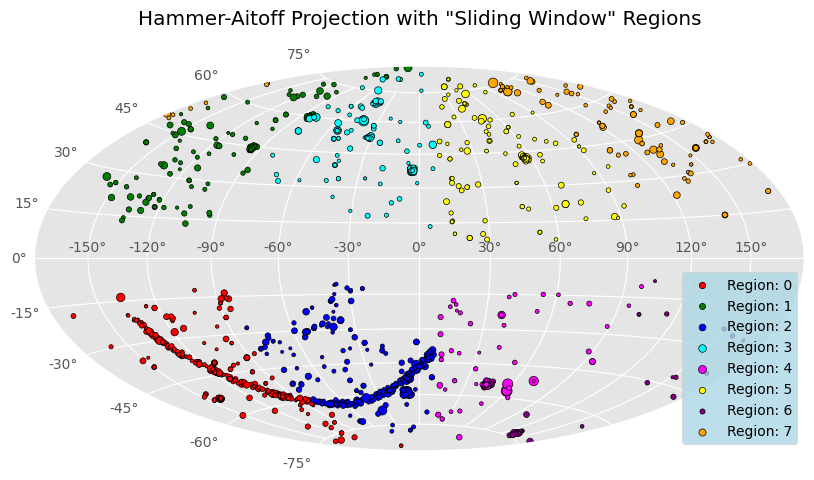

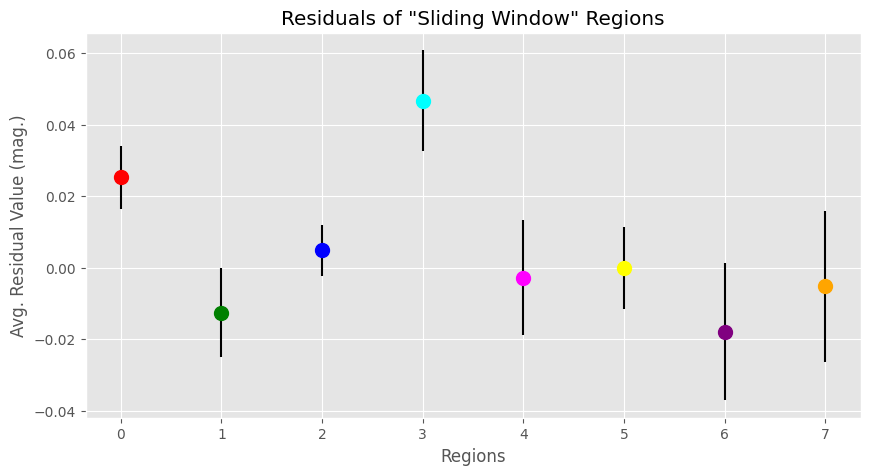

In [ ]:
#create "arbitrary" sky plot for thresholds with the lowest p-values

l_deg_shifted = np.where(l_deg < lowest_index, l_deg + 360, l_deg)

new_thresholds_l = [l+lowest_index for l in thresholds_l]

regions = create_arbitrary_skyplot(new_thresholds_l, unnorm_residuals, l_deg_shifted, b_deg)
create_arbitrary_errorbars2(regions, unnorm_residuals)

In [ ]:
#do t-tests for all groups for the sliding window plot

thresholds_l = [0,90,180,270,360]
thresholds_b = [-90,0,90]

#list of numpy arrays -> each numpy array is a bin in a grid of coordinates
bins = []

#iterate through the thresholds and split the array at each threshold
for i in range(len(new_thresholds_l) - 1):
    for j in range(len(thresholds_b) - 1):
      condition = ((l_deg > new_thresholds_l[i]) & (l_deg < new_thresholds_l[i+1])) & ((b_deg > thresholds_b[j]) & (b_deg < thresholds_b[j+1]))
      vals = unnorm_residuals[condition]
      bins.append(vals)

#print(bins)

length = 0
for i in range(len(bins)):
  mean = sum(bins[i])/len(bins[i])
  print(mean)
  print(len(bins[i]))

for i in range(len(bins)):
  for j in range(i+1, len(bins)):
    t_statistic, p_value = scipy.stats.ttest_ind(bins[i], bins[j])
    print(f"P-Value: {p_value} between groups {i} and {j}")


bins = []

0.025405541563298124
331
-0.01255870205378718
183
0.004870528880316372
495
0.04677858686375766
179
-0.0027780505550328233
162
-6.563094370001026e-05
194
-0.017886027675909938
49
-0.009843919033321739
100
P-Value: 0.011792773524896133 between groups 0 and 1
P-Value: 0.0689747887257405 between groups 0 and 2
P-Value: 0.1781214776005673 between groups 0 and 3
P-Value: 0.09620881828297216 between groups 0 and 4
P-Value: 0.07815537220855741 between groups 0 and 5
P-Value: 0.07299187590116477 between groups 0 and 6
P-Value: 0.0800034113592794 between groups 0 and 7
P-Value: 0.20984052249129972 between groups 1 and 2
P-Value: 0.0016871341750061021 between groups 1 and 3
P-Value: 0.6267209958241643 between groups 1 and 4
P-Value: 0.45721459487754157 between groups 1 and 5
P-Value: 0.8374772998836799 between groups 1 and 6
P-Value: 0.9075957472127785 between groups 1 and 7
P-Value: 0.004025298654302324 between groups 2 and 3
P-Value: 0.6206057438959303 between groups 2 and 4
P-Value: 0.71214683

In [ ]:
mu_resid_total = np.mean(unnorm_residuals)
sd_resid_total = np.std(unnorm_residuals)

In [ ]:
'''
Monte Carlo Simulation Begins Here
'''
#calculate mean and sd of all SN residuals

np.random.seed(1)

#count1: lowest p-value
count1 = 0
regions = [0,0,0,0,0,0,0,0]
p_values = []
for i in range(1000):
  #generate random data
  rand_data = np.random.normal(mu_resid_total, sd_resid_total, 1701)

  lowest_p_monte, lowest_index_monte, lowest_text_monte = sliding_plot(l_deg, b_deg, rand_data)
  if(lowest_p_monte < lowest_p):
    count1 = count1+1

  region1 = int(lowest_text_monte[0])
  region2 = int(lowest_text_monte[2])
  if(lowest_index_monte > 45):
    region1 = (region1+2)%8
    region2 = (region2+2)%8

  regions[region1] = regions[region1]+1
  regions[region2] = regions[region2]+1

  p_values.append(lowest_p_monte)

print(count1)
print(regions)




KeyboardInterrupt: ignored

[-5.65492441 -4.07060395 -1.98864207 -2.28666253 -1.88176879 -2.19587184
 -1.42228389 -2.61328355 -1.58253824 -1.86926824 -2.21065276 -1.3848941
 -2.5899376  -1.91390869 -1.93256351 -4.14663792 -4.49801067 -2.64411699
 -1.15510181 -1.30803038 -3.9963392  -1.97248022 -2.63393847 -2.15694437
 -2.83409892 -3.60865441 -2.39015564 -0.84219745 -2.0301615  -2.17898751
 -1.8054007  -1.75377895 -3.62053601 -1.79258047 -2.0489383  -2.2234997
 -3.23943707 -2.72448489 -1.79488704 -1.74578646 -1.84850774 -3.28949783
 -2.7744994  -2.48303444 -1.90040648 -1.74529854 -3.39785747 -2.56927959
 -3.08326743 -2.52532703 -2.81915238 -1.21348857 -1.20175827 -1.85973721
 -1.31318381 -1.07605949 -2.04757233 -2.87805498 -1.77028279 -1.60228458
 -2.84494477 -1.59118725 -3.08753513 -2.89323858 -1.61472883 -2.14466362
 -2.68412026 -1.94478392 -1.55298565 -2.59803972 -1.71248169 -4.46314999
 -1.76847916 -1.95526476 -3.74106541 -2.05013409 -2.31556677 -1.84157973
 -1.39912353 -1.92279151 -2.0589048  -3.01138497 -1.4

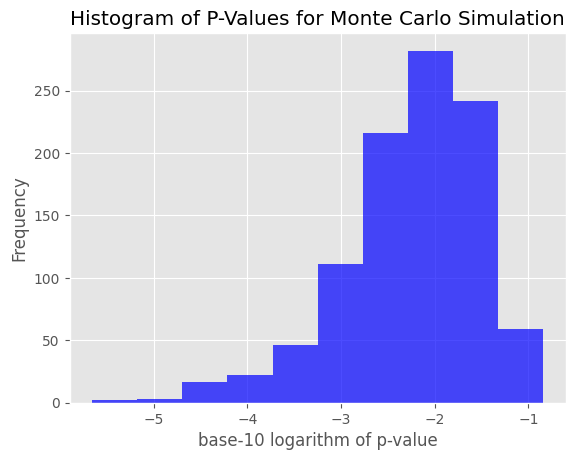

In [ ]:
log_p_values = np.log10(p_values)
print(log_p_values)

plt.hist(log_p_values, bins=10, color='blue', alpha=0.7)

plt.xlabel('base-10 logarithm of p-value')
plt.ylabel('Frequency')
plt.title('Histogram of P-Values for Monte Carlo Simulation')

# Show the plot
plt.grid(True)
plt.show()

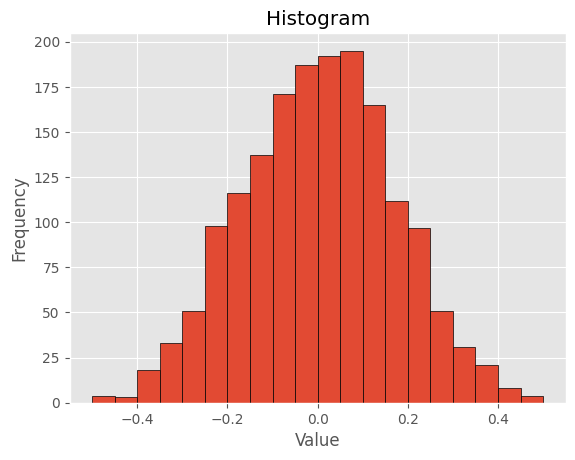

In [ ]:
rand_data = np.random.normal(mu_resid_total, sd_resid_total, 1701)

num_bins = 20
value_range = (-0.5, 0.5)

hist, bins = np.histogram(rand_data, bins=num_bins, range=value_range)

# Plot the histogram
plt.hist(rand_data, bins=num_bins, range=value_range, edgecolor='k')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#count2: lowest 3 p-values
count2 = 0

#count1: fail only if regions aren't the same but satifies p-value condition
count1 = 0

num = 0

np.random.seed(3)

third_highest = []

for trial in range(1000):
  #generate random data
  rand_data = np.random.normal(mu_resid_total, sd_resid_total, 1701)
  lowest_p_monte, lowest_index_monte, lowest_text_monte = sliding_plot(l_deg, b_deg, rand_data)

  #shift regreens and create regions
  l_deg_shifted = np.where(l_deg < lowest_index_monte, l_deg + 360, l_deg)
  thresholds_lm = [l+lowest_index_monte for l in thresholds_l]
  #print(lowest_p_monte)

  regions = []
  p_values = []
  for i in range(len(thresholds_l) - 1):
      for j in range(len(thresholds_b) - 1):
        lower_i, higher_i = thresholds_lm[i], thresholds_lm[i+1]
        lower_j, higher_j = thresholds_b[j], thresholds_b[j+1]
        region = (l_deg_shifted > lower_i) & (l_deg_shifted < higher_i) & (b_deg > lower_j) & (b_deg < higher_j)
        regions.append(unnorm_residuals[region])

  #print(len(regions))
  for i in range(len(regions)):
    for j in range(i + 1, len(regions)):
      t_stat, p = scipy.stats.ttest_ind(regions[i], regions[j])
      p_values.append((p, i, j))
  sorted_p_values = sorted(p_values, key=lambda x: x[0])
  #print(sorted_p_values)

  ok = False
  for i in range(8):
    if(((sorted_p_values[0][1] == i) | (sorted_p_values[0][2] == i)) & ((sorted_p_values[1][1] == i) | (sorted_p_values[1][2] == i)) & ((sorted_p_values[2][1] == i)) | ((sorted_p_values[2][2] == i))):
      ok = True

  if(sorted_p_values[2][0] > .01):
    ok = False

  count2 = count2+1 if ok else count2

  third_highest.append(sorted_p_values[2][0])
print(count2)

21


[0.04711581928992576, 0.12030960397992291, 0.12913754609724662, 0.09034804303407964, 0.019321330261528106, 0.11806034921471976, 0.10697642335984076, 0.04639541153113868, 0.03742934484843114, 0.10697642335984076, 0.04241248683510211, 0.00954011394626776, 0.10228981122450398, 0.08975993179558493, 0.10697642335984076, 0.014523412777048708, 0.08975993179558493, 0.10697642335984076, 0.019321330261528106, 0.08333331126759878, 0.02243029771777257, 0.0958355373402993, 0.047772576920608885, 0.12913754609724662, 0.013055320973919598, 0.12913754609724662, 0.04345109728668947, 0.06680129644393094, 0.038935454158289855, 0.042762284467633076, 0.07504896433460205, 0.05312730214666594, 0.013055320973919598, 0.111282898490491, 0.02243029771777257, 0.02243029771777257, 0.06658812533906124, 0.02243029771777257, 0.07167001021429954, 0.018426098021355454, 0.111282898490491, 0.02243029771777257, 0.02243029771777257, 0.029244913295800937, 0.03742934484843114, 0.07167001021429954, 0.038935454158289855, 0.1291

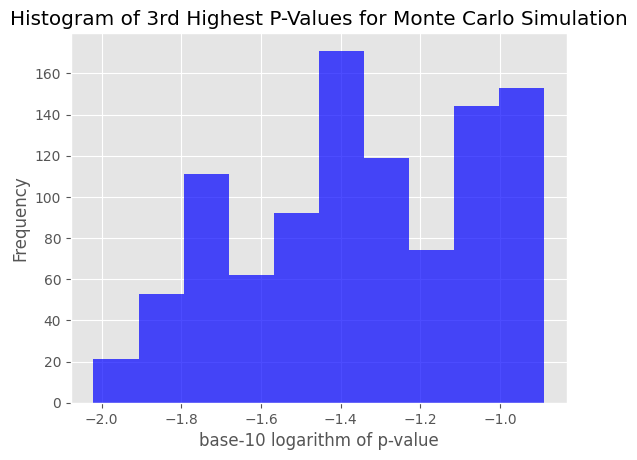

In [ ]:
log_third_highest = np.log10(third_highest)

print(third_highest)

plt.hist(log_third_highest, bins=10, color='blue', alpha=0.7)

plt.xlabel('base-10 logarithm of p-value')
plt.ylabel('Frequency')
plt.title('Histogram of 3rd Highest P-Values for Monte Carlo Simulation')

# Show the plot
plt.grid(True)
plt.show()

1701


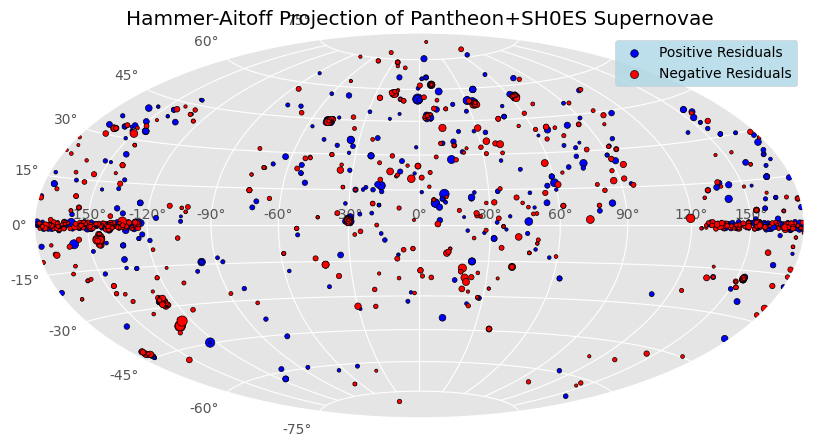

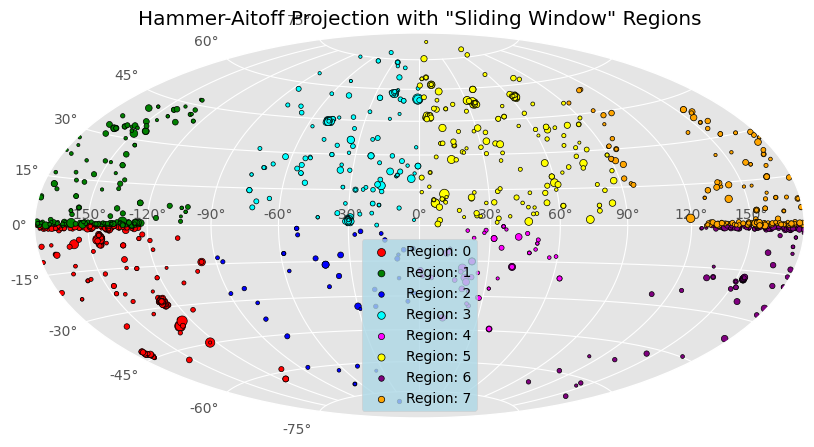

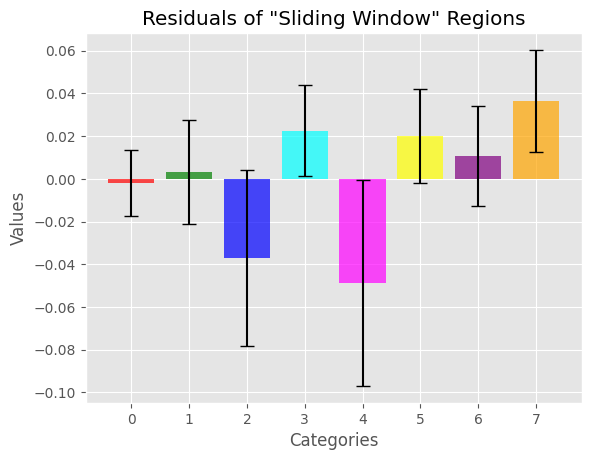

In [ ]:
#do galactic plot and analysis for ra and dec

#creating pos/neg residual plot
print(len(unnorm_residuals))
create_hammer_aitoff(unnorm_residuals, np.degrees(ra), np.degrees(dec))

#creating arbitrary regions plot
regions_radec = create_arbitrary_skyplot(thresholds_l, unnorm_residuals, np.degrees(ra), np.degrees(dec))
create_arbitrary_errorbars(regions_radec, unnorm_residuals)

In [ ]:
lowest_p_radec, lowest_index_radec, lowest_text_radec = sliding_plot(np.degrees(ra), np.degrees(dec))
print(f"lowest p-value: {lowest_p_radec} \n index: {lowest_index_radec} \n {lowest_text_radec}")

lowest p-value: 3.3679997215337946e-06 
 index: 22 
 2 7


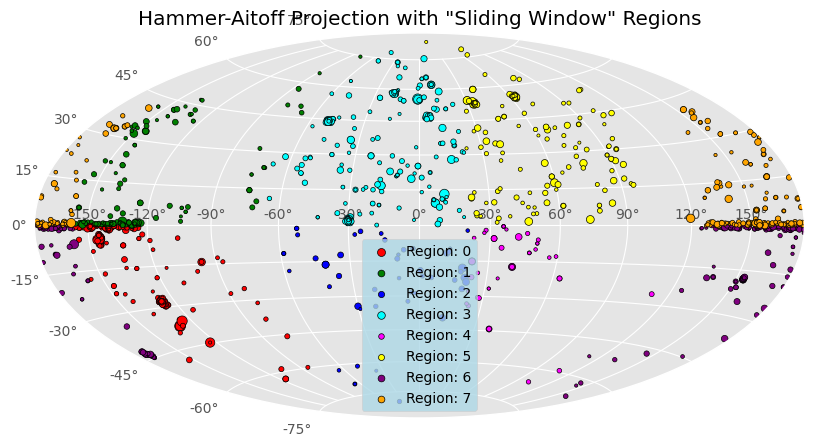

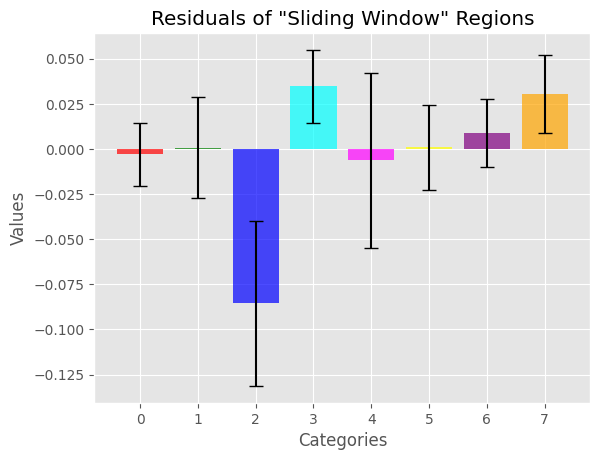

In [ ]:
ra_deg = np.degrees(ra)
dec_deg = np.degrees(dec)

ra_deg_shifted = np.where(ra_deg < 22, ra_deg + 360, ra_deg)

new_thresholds_l = [l+lowest_index_radec for l in thresholds_l]

regions = create_arbitrary_skyplot(new_thresholds_l, unnorm_residuals, ra_deg_shifted, dec_deg)
create_arbitrary_errorbars(regions, unnorm_residuals)

In [ ]:
thresholds_l = [0,90,180,270,360]
thresholds_b = [-90,0,90]

#list of numpy arrays -> each numpy array is a bin in a grid of coordinates
bins = []

#iterate through the thresholds and split the array at each threshold
start_index = 0
for i in range(len(thresholds_l) - 1):
    for j in range(len(thresholds_b) - 1):
      condition = ((l_deg_cosmo > thresholds_l[i]) & (l_deg_cosmo < thresholds_l[i+1])) & ((b_deg_cosmo > thresholds_b[j]) & (b_deg_cosmo < thresholds_b[j+1]))
      vals = y_cosmo[condition]
      bins.append(vals)

for i in range(len(bins)):
  for j in range(i+1, len(bins)):
    t_statistic, p_value = scipy.stats.ttest_ind(bins[i], bins[j])
    print(f"P-Value: {p_value} between groups {i} and {j}")

P-Value: 0.11493208331537332 between groups 0 and 1
P-Value: 0.11917183353089084 between groups 0 and 2
P-Value: 0.48045000824619544 between groups 0 and 3
P-Value: 0.4278314641469513 between groups 0 and 4
P-Value: 0.15465605530945312 between groups 0 and 5
P-Value: 0.2906881270632845 between groups 0 and 6
P-Value: 0.11610057743328676 between groups 0 and 7
P-Value: 0.5447349798182737 between groups 1 and 2
P-Value: 0.3246705073844933 between groups 1 and 3
P-Value: 0.40238060167215084 between groups 1 and 4
P-Value: 0.7420670652939504 between groups 1 and 5
P-Value: 0.9759281910369386 between groups 1 and 6
P-Value: 0.8231425137721503 between groups 1 and 7
P-Value: 0.5371452024862415 between groups 2 and 3
P-Value: 0.6475886980410963 between groups 2 and 4
P-Value: 0.8055217009016122 between groups 2 and 5
P-Value: 0.7141082072167997 between groups 2 and 6
P-Value: 0.4344027100567398 between groups 2 and 7
P-Value: 0.9044778221264931 between groups 3 and 4
P-Value: 0.44968859226776

In [ ]:
thresholds_l = [-180,-120,-60,0,60,120,180]
thresholds_b = [-90,0,90]

#list of numpy arrays -> each numpy array is a bin in a grid of coordinates
bins = []

#iterate through the thresholds and split the array at each threshold
start_index = 0
for i in range(len(thresholds_l) - 1):
    for j in range(len(thresholds_b) - 1):
      print(f"{i} {j}")
      condition = ((l_deg-180 > thresholds_l[i]) & (l_deg-180 < thresholds_l[i+1])) & ((b_deg > thresholds_b[j]) & (b_deg < thresholds_b[j+1]))
      vals = unnorm_residuals[condition]
      bins.append(vals)

for i in range(len(bins)):
  for j in range(i+1, len(bins)):
    t_statistic, p_value = scipy.stats.ttest_ind(bins[i], bins[j])
    print(f"P-Value: {p_value} between groups {i} and {j}")

#the lowest p-values are around 0.01-0.05

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
P-Value: 0.8932956266039507 between groups 0 and 1
P-Value: 0.0031282559791719427 between groups 0 and 2
P-Value: 0.3259384788192585 between groups 0 and 3
P-Value: 0.5689439756667413 between groups 0 and 4
P-Value: 0.04676522883608533 between groups 0 and 5
P-Value: 0.4188513616296966 between groups 0 and 6
P-Value: 0.12932608382350452 between groups 0 and 7
P-Value: 0.8655823823368006 between groups 0 and 8
P-Value: 0.9937935806691333 between groups 0 and 9
P-Value: 0.9625025641517659 between groups 0 and 10
P-Value: 0.2731284542361018 between groups 0 and 11
P-Value: 0.04550461386620532 between groups 1 and 2
P-Value: 0.560003784759188 between groups 1 and 3
P-Value: 0.8046245158237086 between groups 1 and 4
P-Value: 0.18353353975200948 between groups 1 and 5
P-Value: 0.6518614193036837 between groups 1 and 6
P-Value: 0.331460560980403 between groups 1 and 7
P-Value: 0.8573437766858117 between groups 1 and 8
P-Value: 0.9210149779677725

1701


<ipython-input-63-b82aacfac8d4>:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(u_labels))


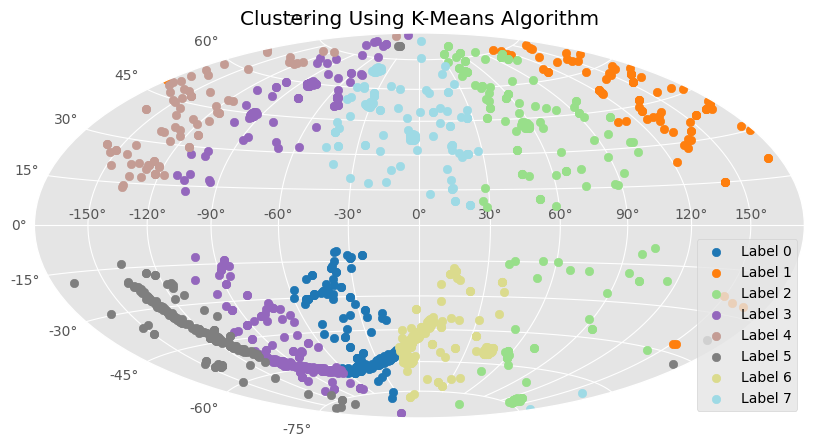

In [ ]:
#using k-means clustering to cluster the star map data using spherical coordinates

#need true distance between two points given lat/lon -> use Haversine formula
def haversine_distance(point1, point2):
    """
    Calculate the haversine distance between two points in (latitude, longitude) format.
    """
    lat1, lon1 = np.radians(point1)
    lat2, lon2 = np.radians(point2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    c = 2 * np.arcsin(np.sqrt((np.sin(dlat/2))**2 + np.cos(lat1)*np.cos(lat2)*(np.sin(dlon/2))**2))
    # Radius of Earth in kilometers
    radius = 6371.0

    distance = radius * c
    return distance

def haversine_distance_matrix(A, B):
    """
    Calculate the haversine distance matrix between points in arrays A and B.
    """
    A = np.array(A)
    B = np.array(B)
    num_points_A = A.shape[0]
    num_points_B = B.shape[0]

    distances = np.zeros((num_points_A, num_points_B))

    for i in range(num_points_A):
        for j in range(num_points_B):
            distances[i, j] = haversine_distance(A[i], B[j])

    return distances

#k-means algorithm
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #randomly choosing centroids
    centroids = x[idx, :]

    #finding the distance between centroids and all the data points
    distances = haversine_distance_matrix(x, centroids)

    #Centroid with the minimum distance
    points = np.array([np.argmin(i) for i in distances])
    print(len(points))

    #Repeating the above steps for a defined number of iterations
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids

        distances = haversine_distance_matrix(x, centroids)
        points = np.array([np.argmin(i) for i in distances])

    return points

np.random.seed(0)

#perform k-means on our data
coords = np.array([l_deg, b_deg])
coords = np.rot90(coords, k=1) #need to switch the rows and columns
#print(coords)
labels = kmeans(coords, 8, 50)
u_labels = np.unique(labels)

plt.figure(figsize=(10, 5))
plt.subplot(111, projection='hammer')
plt.title('Clustering Using K-Means Algorithm')

# Create a colormap
cmap = plt.cm.get_cmap('tab20', len(u_labels))

# Create a scatter plot with different colors for different labels
for i, label in enumerate(u_labels):
    plt.scatter(np.radians(coords[labels == label, 0] - 180), np.radians(coords[labels == label, 1]), color=cmap(i), label=f'Label {label}')
plt.legend()
plt.show()


1701


<ipython-input-64-548696401012>:112: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(u_labels))


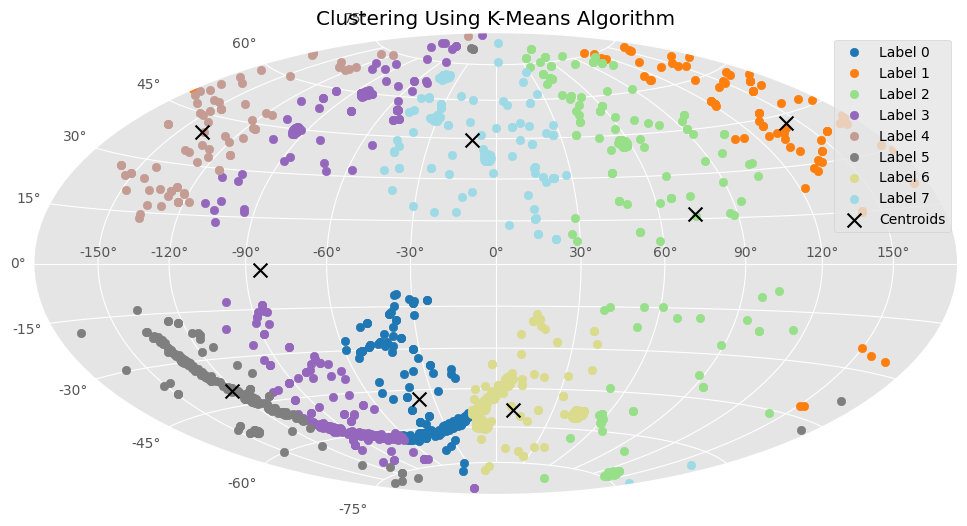

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Using k-means clustering to cluster the star map data using spherical coordinates

# Need true distance between two points given lat/lon -> use Haversine formula

#phi = lat, gamma = long
def haversine_distance(point1, point2):
    """
    Calculate the haversine distance between two points in (latitude, longitude) format.
    """
    lat1, lon1 = np.radians(point1)
    lat2, lon2 = np.radians(point2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.atan2(np.sqrt(a), np.sqrt(1 - a))

    # Radius of Earth in kilometers
    radius = 6371.0

    distance = radius * c
    return distance

def vincenty_distance(point1, point2):
    lat1, lon1 = np.radians(point1)
    lat2, lon2 = np.radians(point2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sqrt((np.cos(lat2)*np.sin(dlon))**2 + (np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dlon))**2)
    b = np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(dlon)
    ang_dist = np.arctan2(a, b)
    return ang_dist*6371

def spherical_length(point1, point2):
    lat1, lon1 = np.radians(point1)
    lat2, lon2 = np.radians(point2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    x = np.cos(lat2)*np.cos(lon2) - np.cos(lat1)*np.cos(lon1)
    y = np.cos(lat2)*np.sin(lon2) - np.cos(lat1)*np.sin(lon1)
    z = np.sin(lat2) - np.sin(lat1)

    ang_dist = np.sqrt(x**2 + y**2 + z**2)
    return ang_dist*6371

def haversine_distance_matrix(A, B):
    """
    Calculate the haversine distance matrix between points in arrays A and B.
    """
    A = np.array(A)
    B = np.array(B)
    num_points_A = A.shape[0]
    num_points_B = B.shape[0]

    distances = np.zeros((num_points_A, num_points_B))

    for i in range(num_points_A):
        for j in range(num_points_B):
            distances[i, j] = spherical_length(A[i], B[j])

    return distances

# K-means algorithm
def kmeans(x, k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    # Randomly choosing centroids
    centroids = x[idx, :]

    # Finding the distance between centroids and all the data points
    distances = haversine_distance_matrix(x, centroids)

    # Centroid with the minimum distance
    points = np.array([np.argmin(i) for i in distances])
    print(len(points))

    # Repeating the above steps for a defined number of iterations
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            # updating centroids by taking the mean of cluster it belongs to
            temp_cent = x[points == idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)  # updated centroids

        distances = haversine_distance_matrix(x, centroids)
        points = np.array([np.argmin(i) for i in distances])

    return points, centroids  # Return both the points and centroids

np.random.seed(0)

coords = np.array([l_deg, b_deg])
coords = np.rot90(coords, k=1)  # Need to switch the rows and columns

labels, centroids = kmeans(coords, 8, 50)
u_labels = np.unique(labels)

plt.figure(figsize=(12, 6))
plt.subplot(111, projection='hammer')
plt.title('Clustering Using K-Means Algorithm')

# Create a colormap
cmap = plt.cm.get_cmap('tab20', len(u_labels))

# Create a scatter plot with different colors for different labels
for i, label in enumerate(u_labels):
    plt.scatter(
        np.radians(coords[labels == label, 0] - 180),
        np.radians(coords[labels == label, 1]),
        color=cmap(i),
        label=f'Label {label}'
    )

#bolden the centroids
plt.scatter(
    np.radians(centroids[:, 0] - 180),
    np.radians(centroids[:, 1]),
    color='black',
    marker='x',
    s=100,  #adjust the size as needed
    label='Centroids'
)

plt.legend(loc='upper right')
plt.show()

<ipython-input-65-bdd9c029b905>:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(u_labels))


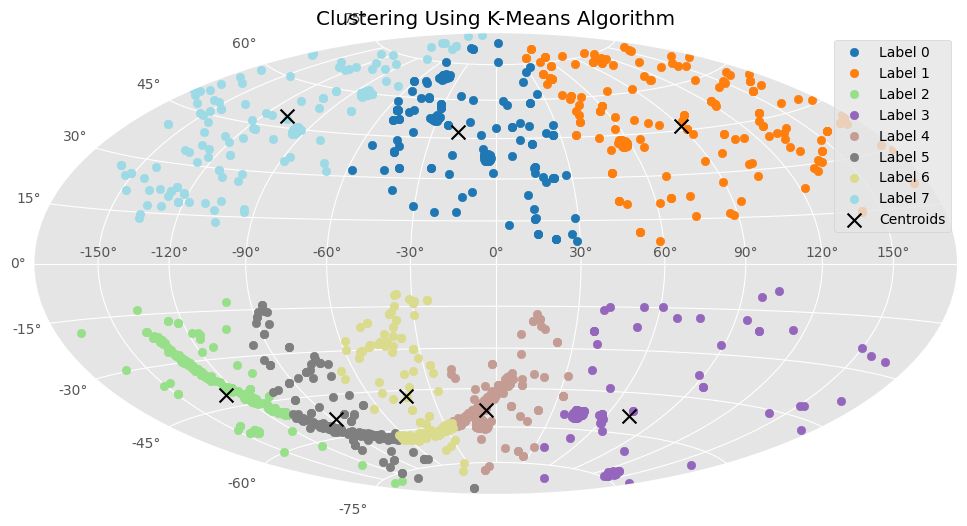

In [ ]:
def length(point1, point2):
  lat1, lon1 = np.radians(point1)
  lat2, lon2 = np.radians(point2)

  dlat = (lat1-lat2)**2
  dlon = min((lon1-lon2)**2, (lon1+(2*np.pi) - lon2)**2, (lon1-(2*np.pi) - lon2)**2)

  return 6371*(np.sqrt(dlat + dlon))

def haversine_distance_matrix(A, B):
    """
    Calculate the haversine distance matrix between points in arrays A and B.
    """
    A = np.array(A)
    B = np.array(B)
    num_points_A = A.shape[0]
    num_points_B = B.shape[0]

    distances = np.zeros((num_points_A, num_points_B))

    for i in range(num_points_A):
        for j in range(num_points_B):
            distances[i, j] = length(A[i], B[j])

    return distances

#k-means algorithm
def kmeans(x, k, iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #randomly choosing centroids
    centroids = x[idx, :]

    #finding the distance between centroids and all the data points
    distances = haversine_distance_matrix(x, centroids)

    #centroid with the minimum distance
    points = np.array([np.argmin(i) for i in distances])

    #repeating the above steps for a defined number of iterations
    for _ in range(iterations):
        centroids = []
        for idx in range(k):
            #updating centroids by taking the mean of cluster it belongs to
            temp_cent = x[points == idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)  #updated centroids

        distances = haversine_distance_matrix(x, centroids)
        points = np.array([np.argmin(i) for i in distances])

    return points, centroids  #return both the points and centroids

coords = np.array([l_deg, b_deg])
coords = np.rot90(coords, k=1)  #need to switch the rows and columns

labels, centroids = kmeans(coords, 8, 50)
u_labels = np.unique(labels)

plt.figure(figsize=(12, 6))
plt.subplot(111, projection='hammer')
plt.title('Clustering Using K-Means Algorithm')

# Create a colormap
cmap = plt.cm.get_cmap('tab20', len(u_labels))

# Create a scatter plot with different colors for different labels
for i, label in enumerate(u_labels):
    plt.scatter(
        np.radians(coords[labels == label, 0] - 180),
        np.radians(coords[labels == label, 1]),
        color=cmap(i),
        label=f'Label {label}'
    )

#bolden the centroids
plt.scatter(
    np.radians(centroids[:, 0] - 180),
    np.radians(centroids[:, 1]),
    color='black',
    marker='x',
    s=100,  #adjust the size as needed
    label='Centroids'
)

plt.legend(loc='upper right')
plt.show()

In [ ]:
#spherical harmonic analysis.... begins here

power = sum(unnorm_residuals**2)

mode =